# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from scipy import stats
from sklearn.model_selection import train_test_split
from statistics import LinearRegression
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# IMPORT DATASETS

In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [3]:
train_df

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,510.0,23.20,240.0,90.4
1,1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,300.0,8.50,190.0,130.0
2,2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,370.0,25.00,230.0,160.0
3,3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,110.0,5.00,97.0,41.0
4,4,240.0,147.0,70.0,0.600,48.0,6.800,93.0,1410.0,418.00,950.0,586.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6395,6395,180.0,58.0,40.0,0.180,25.0,3.600,22.0,540.0,48.00,400.0,219.0
6396,6396,44.0,5.7,3.0,0.120,3.7,0.470,5.9,100.0,0.85,56.0,30.0
6397,6397,138.0,40.3,28.4,0.100,14.2,8.600,31.0,438.0,17.70,300.0,159.0
6398,6398,210.0,110.0,190.0,0.230,47.0,7.900,120.0,1400.0,140.00,800.0,470.0


In [4]:
test_df.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids
count,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000
mean,7200.000000,168.832299,55.668958,51.481462,0.349397,62.757297,3.423275,77.886431,659.276702,75.164221,409.850094
std,462.313206,82.953613,41.717342,77.520902,0.551632,1724.080876,4.968633,780.983717,620.275872,121.649147,271.134286
min,6400.000000,9.400000,0.260000,0.460000,0.000000,0.064000,0.004740,2.200000,66.000000,0.390000,29.000000
25%,6800.000000,110.000000,26.000000,12.000000,0.140000,7.800000,0.770000,21.000000,351.000000,13.100000,230.000000
50%,7200.000000,160.000000,46.200000,31.000000,0.210000,15.000000,2.000000,35.000000,530.000000,34.000000,330.000000
75%,7600.000000,210.000000,74.000000,63.000000,0.380000,25.000000,4.300000,61.000000,815.000000,94.600000,510.000000
max,8000.000000,700.000000,460.000000,1300.000000,9.900000,69000.000000,58.200000,27400.000000,17400.000000,2100.000000,2300.000000


# DATA PREP

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6400 non-null   int64  
 1   Alkalinity, total       6400 non-null   float64
 2   Calcium                 6400 non-null   float64
 3   Chloride                6400 non-null   float64
 4   Fluoride                6400 non-null   float64
 5   Magnesium               6400 non-null   float64
 6   Nitrate as N            6400 non-null   float64
 7   Sodium                  6400 non-null   float64
 8   Specific Conductivity   6400 non-null   float64
 9   Sulfate                 6400 non-null   float64
 10  Total Dissolved Solids  6400 non-null   float64
 11  Hardness                6400 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 600.1 KB


In [6]:
train_df.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,3199.500000,167.151047,69.350432,53.213620,0.333625,23.446335,3.382707,62.437731,637.631953,71.645934,409.570669,216.148203
std,1847.665193,83.157803,1052.136452,92.934505,0.452473,325.389503,4.878279,556.891904,597.297274,108.414049,302.958442,161.431526
min,0.000000,12.000000,0.610000,0.580000,0.049000,0.051000,0.002300,1.300000,40.000000,0.140000,19.580000,2.500000
25%,1599.750000,110.000000,25.000000,11.000000,0.140000,7.300000,0.850000,21.000000,340.000000,13.000000,220.000000,101.000000
50%,3199.500000,153.500000,45.000000,28.000000,0.210000,14.000000,2.000000,35.000000,520.000000,33.000000,320.000000,180.000000
75%,4799.250000,209.000000,72.000000,62.000000,0.382250,25.000000,4.300000,60.000000,800.000000,85.000000,500.000000,281.000000
max,6399.000000,1000.000000,83000.000000,2100.000000,9.000000,26000.000000,106.000000,32000.000000,31400.000000,2000.000000,4100.000000,1901.000000


## Drop Unuse Feature

In [7]:
train_df = train_df.drop(columns=['id'])

## Handle Null Values

In [8]:
train_df.isnull().sum()

Alkalinity, total         0
Calcium                   0
Chloride                  0
Fluoride                  0
Magnesium                 0
Nitrate as N              0
Sodium                    0
Specific Conductivity     0
Sulfate                   0
Total Dissolved Solids    0
Hardness                  0
dtype: int64

## Handle Outlier

In [9]:
def percentage_outliers_iqr(df):
    outliers_percentage = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        total = len(df[column])
        percentage = (outliers / total) * 100
        outliers_percentage[column] = percentage
    return outliers_percentage


In [10]:
outliers_percentage = percentage_outliers_iqr(train_df)

In [11]:
def removeOutlier(df, col):
    kuartil1 = col.quantile(0.25)
    kuartil3 = col.quantile(0.75)
    IQR = kuartil3 - kuartil1
    lower_bound = kuartil1 - 1.5 * IQR
    upper_bound = kuartil3 + 1.5 * IQR
    df = df[(col >= lower_bound) & (col <= upper_bound)]
    return df

In [12]:
clean_train_df = train_df.copy()

outliers_percentage = percentage_outliers_iqr(clean_train_df)

for col in clean_train_df.columns:
    if col != "id" and clean_train_df[col].dtypes != object:
        if outliers_percentage[col] > 5:
            clean_train_df[col] = np.log1p(clean_train_df[col])
        else:
            clean_train_df = removeOutlier(clean_train_df, clean_train_df[col])
        

In [13]:
clean_train_df

,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,120.0,24.0,2.066863,0.273076,2.091864,0.404131,3.891820,510.0,3.186353,5.484797,90.4
1,140.0,41.0,2.484907,0.139762,2.014903,0.667829,2.995732,300.0,2.251292,5.252273,130.0
2,160.0,51.0,2.302585,0.371564,2.312535,1.252763,2.564949,370.0,3.258097,5.442418,160.0
3,46.0,13.0,1.360977,0.113329,1.308333,0.357674,2.001480,110.0,1.791759,4.584967,41.0
5,154.0,49.2,3.951244,0.223144,2.451005,0.438255,3.964615,619.0,4.615121,5.826000,198.0
...,...,...,...,...,...,...,...,...,...,...,...
6393,115.0,27.9,2.766319,0.095310,2.322388,1.360977,3.091042,292.0,1.629241,5.384495,113.0
6395,180.0,58.0,3.713572,0.165514,3.258097,1.526056,3.135494,540.0,3.891820,5.993961,219.0
6396,44.0,5.7,1.386294,0.113329,1.547563,0.385262,1.931521,100.0,0.615186,4.043051,30.0
6397,138.0,40.3,3.380995,0.095310,2.721295,2.261763,3.465736,438.0,2.928524,5.707110,159.0


In [14]:
clean_train_df.describe()

,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000
mean,154.255494,46.671512,3.201088,0.253165,2.529553,1.156416,3.511040,531.407192,3.352391,5.717488,181.621282
std,64.660236,28.259291,1.015936,0.196209,0.812991,0.669267,0.692113,266.130708,1.140360,0.496596,105.101574
min,21.000000,1.000000,0.457425,0.047837,0.049742,0.002297,0.832909,40.000000,0.131028,3.024320,3.500000
25%,110.000000,24.000000,2.397895,0.122218,2.054124,0.604316,3.044522,320.000000,2.553321,5.353040,99.000000
50%,150.000000,41.200000,3.218876,0.182322,2.639057,1.098612,3.496508,480.000000,3.367296,5.707110,160.000000
75%,190.000000,65.000000,3.970292,0.314811,3.091042,1.620376,3.970292,690.000000,4.219508,6.066108,250.000000
max,355.000000,140.000000,6.523562,2.302585,10.165890,4.044804,10.373522,1350.000000,6.311735,7.741099,487.000000


# FEATURE ENGINEERING

## LABEL CORRELATION

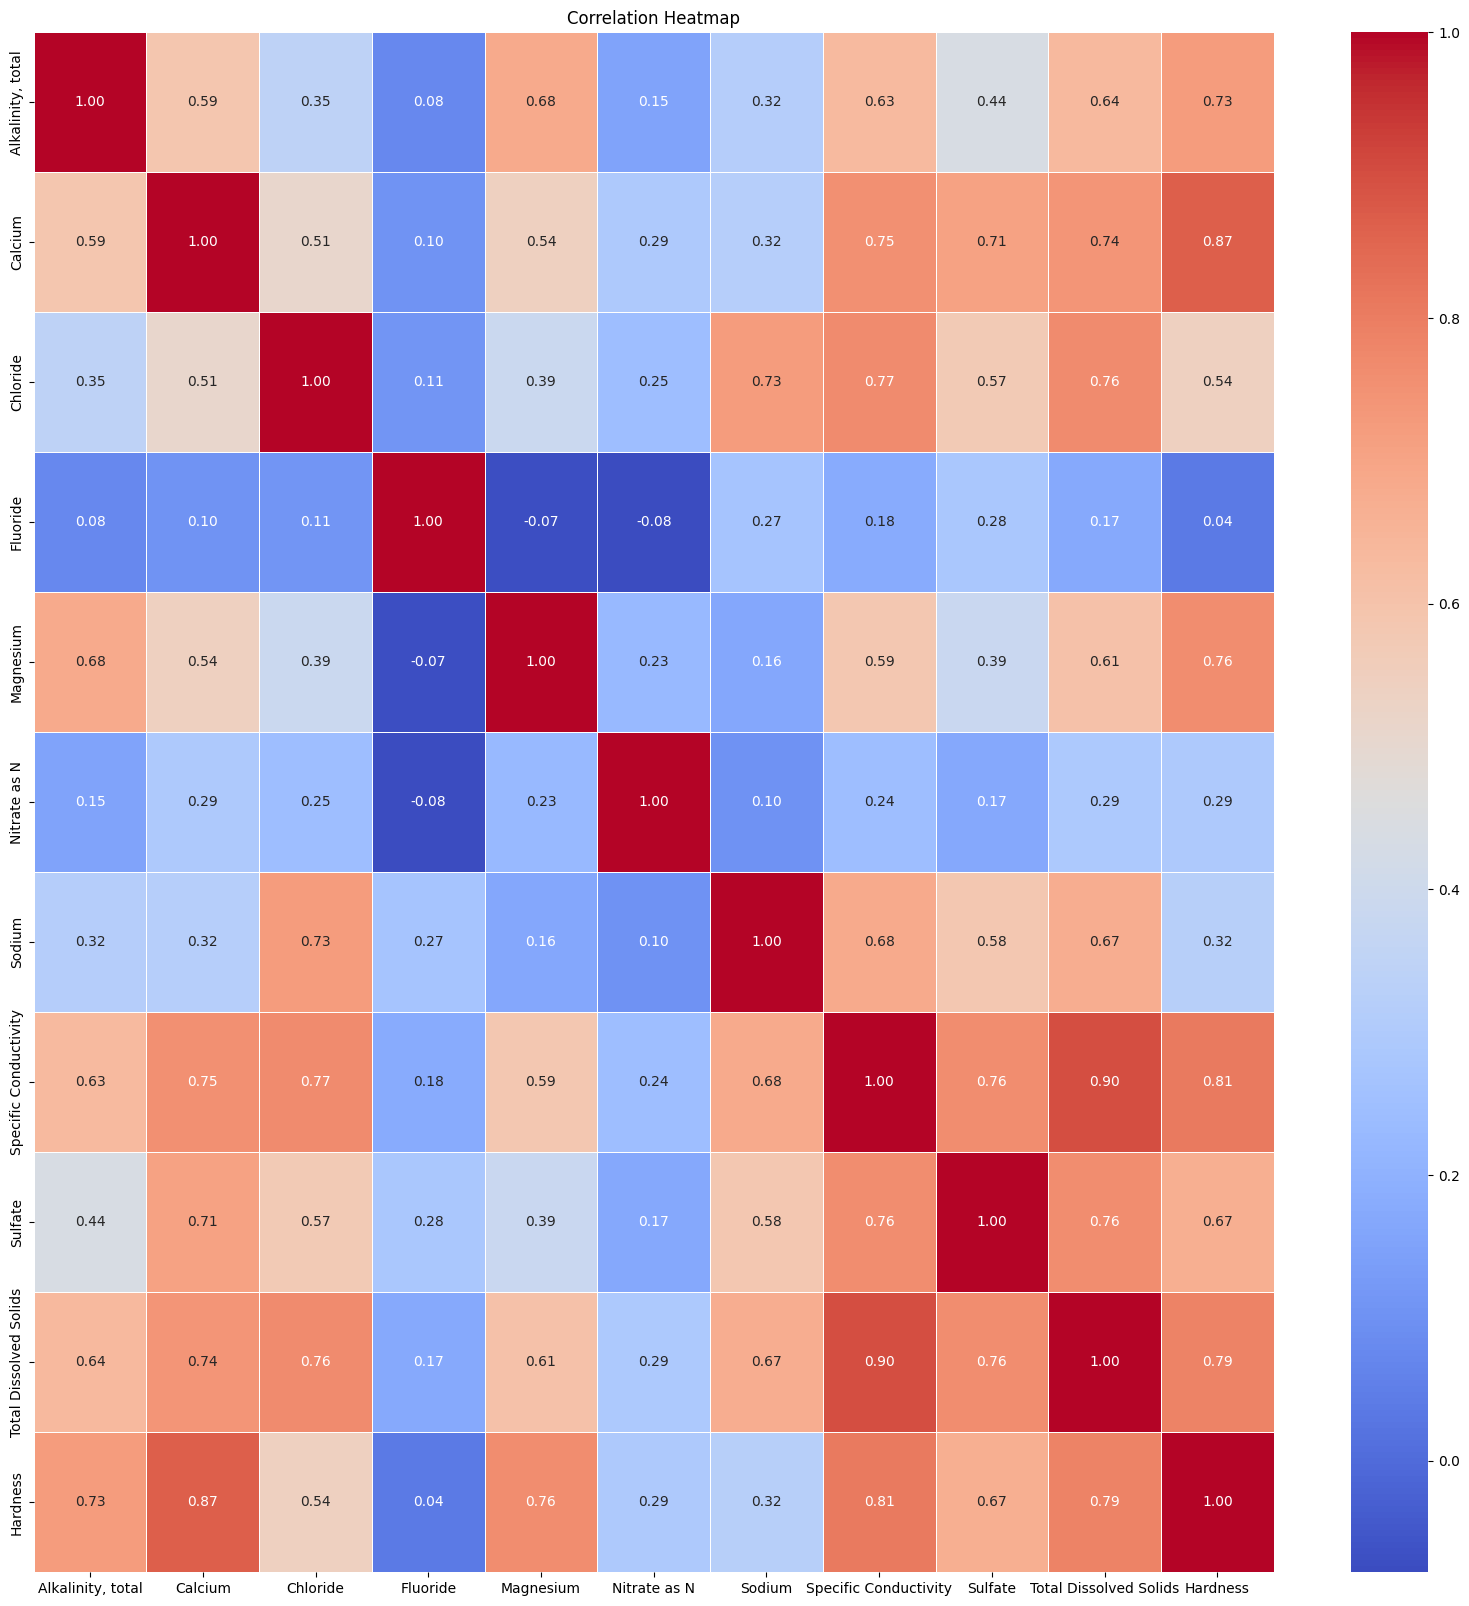

In [15]:
# Calculate the correlation matrix
correlation_matrix = clean_train_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# MODEL CREATION

## Split Feature

In [16]:
X = train_df.drop(columns=['Hardness'])
y = train_df['Hardness']

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

In [17]:
y.describe()

count    6400.000000
mean      216.148203
std       161.431526
min         2.500000
25%       101.000000
50%       180.000000
75%       281.000000
max      1901.000000
Name: Hardness, dtype: float64

## Linear Regression

In [18]:
# Scale the features
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_val_scaled = scaler.transform(X_val)

# Train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_train)
y_val_pred = linear_reg.predict(X_val)

In [19]:
from sklearn.metrics import r2_score

r2 = r2_score(y_train, y_pred)
print(r2)

0.9124644481700032


## Random Forest

In [20]:
best_params = {'n_estimators': 76, 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 1} 

In [21]:
from sklearn.ensemble import RandomForestRegressor


best_params['random_state'] = 42
random_forest = RandomForestRegressor(**best_params)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_train)

In [22]:
r2 = r2_score(y_train, y_pred)
print(r2)

0.9874729199454221


## KNN

In [23]:
from sklearn import neighbors

rmse_val = [] 
for K in range(20):
    K = K+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_val) 
    r2 = r2_score(y_val, y_pred)
    print(r2)

0.6914058841324628
0.7683241238385222
0.7752946624404238
0.7937559926607152
0.8035613755781128
0.8162099946419373
0.8097268503385763
0.8036862193706299
0.8072747629740007
0.8143245399767691
0.8099791409747046
0.8083892020037934
0.807273601569975
0.8084491698294257
0.8066609788492093
0.8050311233133222
0.8012550245860461
0.8024463727219036
0.8049619742056842
0.8056529925826081


## STACK: RF, KNN

In [24]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV


estimators = [('Random Forest', random_forest),
              ('KNN', knn)]

stacking_regressor_rf_knn = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())

In [25]:
stacking_regressor_rf_knn.fit(X_train, y_train) 
y_pred = stacking_regressor_rf_knn.predict(X_val) 
r2 = r2_score(y_val, y_pred)
print(r2)

0.9094403009579306


## STACK: KNN, RF

In [26]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV


estimators = [('KNN', knn),
              ('Random Forest', random_forest)]

stacking_regressor_knn_rf = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())

In [27]:
stacking_regressor_knn_rf.fit(X_train, y_train) 
y_pred = stacking_regressor_knn_rf.predict(X_val) 
r2 = r2_score(y_val, y_pred)
print(r2)

0.9094403013469152


## XGB

In [28]:
import xgboost as xgb

xgb_r = xgb.XGBRegressor(n_estimators=25, 
                         objective="reg:squarederror", 
                         eval_metric="rmse",
                         early_stopping_rounds=2, 
                         learning_rate=0.2, 
                         random_state=0)

xgb_r.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_val, y_val)],
          verbose=5)

[0]	validation_0-rmse:132.27989	validation_1-rmse:136.97766
[5]	validation_0-rmse:60.02178	validation_1-rmse:66.30036
[10]	validation_0-rmse:39.71821	validation_1-rmse:47.82295
[15]	validation_0-rmse:32.47075	validation_1-rmse:45.04887
[20]	validation_0-rmse:29.79959	validation_1-rmse:44.43256
[24]	validation_0-rmse:28.81389	validation_1-rmse:44.23375


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=2,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=25, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [29]:
y_pred = xgb_r.predict(X_val) 
r2 = r2_score(y_val, y_pred)
print(r2)

0.9290308494441567


## STACK: RF, XGBR

In [30]:
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

xgb = XGBRegressor()
rf = RandomForestRegressor()

stacking_regressor_rf_xgb = StackingCVRegressor(regressors=(rf, xgb),
                            meta_regressor=xgb, cv=5,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stacking_regressor_rf_xgb.fit(X_train, y_train)

StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate...
                                             learning_rate=None, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None,
                                             random_state=None, ...)),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [31]:
stacking_regressor_xgb_rf = StackingCVRegressor(regressors=(xgb, rf),
                            meta_regressor=rf, cv=5,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stacking_regressor_xgb_rf.fit(X_train, y_train)

StackingCVRegressor(meta_regressor=RandomForestRegressor(), random_state=42,
                    regressors=(XGBRegressor(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             grow_policy=None,
                                             importance_...
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None,
                                             random_state=None, ...),
                                RandomForestRegressor()),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [32]:
y_pred = stacking_regressor_rf_xgb.predict(X_val) 
r2 = r2_score(y_val, y_pred)
print(r2)

0.9160365525830882


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [33]:
y_pred = stacking_regressor_xgb_rf.predict(X_val) 
r2 = r2_score(y_val, y_pred)
print(r2)

0.9068816766810665


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


### Neural Network

In [34]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adadelta, Adagrad, Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import optuna


# Neural Network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

def objective_neural_network(trial):
    layer_1 = trial.suggest_int("layer_1", 2, 8)
    layer_2 = trial.suggest_int("layer_2", 2, 8)
    layer_3 = trial.suggest_int("layer_3", 2, 8)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    dropout_rate = trial.suggest_float("dropout_rate", 0.0, 0.5)
    epoch = trial.suggest_int("epoch", 10, 50)
    batch_size = trial.suggest_int("batch_size", 1, 100)
    optimizer_name = trial.suggest_categorical("optimizer", ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD'])

    optimizer_map = {
        'Adadelta': Adadelta(learning_rate=learning_rate),
        'Adagrad': Adagrad(learning_rate=learning_rate),
        'Adam': Adam(learning_rate=learning_rate),
        'RMSprop': RMSprop(learning_rate=learning_rate),
        'SGD': SGD(learning_rate=learning_rate)
    }

    optimizer = optimizer_map[optimizer_name]

    neural_network = Sequential()
    neural_network.add(Dense(layer_1, input_shape=(X_train_scaled.shape[1],), activation='relu'))
    neural_network.add(Dropout(dropout_rate))
    neural_network.add(Dense(layer_2, activation='relu'))
    neural_network.add(Dropout(dropout_rate))
    neural_network.add(Dense(layer_3, activation='relu'))
    neural_network.add(Dropout(dropout_rate))
    neural_network.add(Dense(1, activation='relu'))

    neural_network.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    neural_network.fit(X_train_scaled, y_train, epochs=epoch, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping])

    y_pred = neural_network.predict(X_train_scaled)
    mae = mean_absolute_error(y_train, y_pred)
    
    return mae

study = optuna.create_study(direction='minimize')
study.optimize(objective_neural_network, n_trials=100)

print("Best value (MAE):", study.best_value)
print("Best parameters:", study.best_params)


[I 2024-06-29 12:53:28,608] A new study created in memory with name: no-name-07362f88-c200-4af6-a4e7-ff7540609041
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/22
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 704155.6250 - mean_absolute_error: 300.9185 - val_loss: 70001.7734 - val_mean_absolute_error: 214.6509
Epoch 2/22
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 72566.2344 - mean_absolute_error: 218.2122 - val_loss: 70001.7734 - val_mean_absolute_error: 214.6509
Epoch 3/22
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 68812.0703 - mean_absolute_error: 212.5668 - val_loss: 70001.7734 - val_mean_absolute_error: 214.6509
Epoch 4/22
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 73943.2734 - mean_absolute_error: 218.3646 - val_loss: 70001.7734 - val_mean_absolute_error: 214.6509
Epoch 5/22
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 75600.1094 - mean_absolute_error: 217.0367 - val_loss: 70001.7734 - val_mean_absolute_error: 214.6509
Epoch 6/22
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 71239.2812 - mean_absolute_error: 215.1657 - val_loss: 70001.7734 - val_mean_absolute_error: 214.6509
160/160 ━━━━━━━━━

[I 2024-06-29 12:53:30,870] Trial 0 finished with value: 215.42847832031254 and parameters: {'layer_1': 5, 'layer_2': 3, 'layer_3': 8, 'learning_rate': 0.05777371727789711, 'dropout_rate': 0.2845112319875573, 'epoch': 22, 'batch_size': 28, 'optimizer': 'SGD'}. Best is trial 0 with value: 215.42847832031254.


Epoch 1/29


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 71567.9766 - mean_absolute_error: 215.0333 - val_loss: 70001.7812 - val_mean_absolute_error: 214.6510
Epoch 2/29
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 72487.8672 - mean_absolute_error: 216.9514 - val_loss: 70001.7812 - val_mean_absolute_error: 214.6510
Epoch 3/29
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 72519.2812 - mean_absolute_error: 214.8104 - val_loss: 70001.7812 - val_mean_absolute_error: 214.6510
Epoch 4/29
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 73477.3359 - mean_absolute_error: 219.1075 - val_loss: 70001.7812 - val_mean_absolute_error: 214.6510
Epoch 5/29
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 73488.8359 - mean_absolute_error: 214.8275 - val_loss: 70001.7812 - val_mean_absolute_error: 214.6510
Epoch 6/29
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 69619.3594 - mean_absolute_error: 212.5677 - val_loss: 70001.7812 - val_mean_absolute_error: 214.6510
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step


[I 2024-06-29 12:53:32,752] Trial 1 finished with value: 215.42847832031254 and parameters: {'layer_1': 4, 'layer_2': 2, 'layer_3': 4, 'learning_rate': 3.5855866375130506e-05, 'dropout_rate': 0.4228973223993803, 'epoch': 29, 'batch_size': 78, 'optimizer': 'Adadelta'}. Best is trial 0 with value: 215.42847832031254.


Epoch 1/36


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 73685.6719 - mean_absolute_error: 216.8115 - val_loss: 69978.7109 - val_mean_absolute_error: 214.5925
Epoch 2/36
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 70231.3984 - mean_absolute_error: 213.1811 - val_loss: 69937.7656 - val_mean_absolute_error: 214.4748
Epoch 3/36
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 74877.4688 - mean_absolute_error: 217.8784 - val_loss: 69882.8984 - val_mean_absolute_error: 214.3176
Epoch 4/36
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 71431.3828 - mean_absolute_error: 214.7520 - val_loss: 69814.9922 - val_mean_absolute_error: 214.1205
Epoch 5/36
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 74512.9531 - mean_absolute_error: 218.5716 - val_loss: 69728.0781 - val_mean_absolute_error: 213.8684
Epoch 6/36
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 73680.3438 - mean_absolute_error: 215.1406 - val_loss: 69626.5938 - val_mean_absolute_error: 213.5700
Epoch 7/36
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

[I 2024-06-29 12:53:38,145] Trial 2 finished with value: 144.26941491041777 and parameters: {'layer_1': 2, 'layer_2': 5, 'layer_3': 5, 'learning_rate': 0.0004959333388459634, 'dropout_rate': 0.479403944888495, 'epoch': 36, 'batch_size': 58, 'optimizer': 'Adam'}. Best is trial 2 with value: 144.26941491041777.


Epoch 1/33


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - loss: 71435.2344 - mean_absolute_error: 213.6592 - val_loss: 69962.3203 - val_mean_absolute_error: 214.5875
Epoch 2/33
456/456 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 72903.6328 - mean_absolute_error: 215.8682 - val_loss: 69962.3047 - val_mean_absolute_error: 214.5874
Epoch 3/33
456/456 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 73339.3672 - mean_absolute_error: 216.4323 - val_loss: 69962.2734 - val_mean_absolute_error: 214.5874
Epoch 4/33
456/456 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 71883.6484 - mean_absolute_error: 215.1165 - val_loss: 69962.2500 - val_mean_absolute_error: 214.5873
Epoch 5/33
456/456 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 72507.4297 - mean_absolute_error: 215.7699 - val_loss: 69962.2266 - val_mean_absolute_error: 214.5872
Epoch 6/33
456/456 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 68866.8047 - mean_absolute_error: 210.8478 - val_loss: 69962.1875 - val_mean_absolute_error: 214.5872
Epoch 7/33
456/456 ━━━━━━━━

[I 2024-06-29 12:53:52,585] Trial 3 finished with value: 215.36819747944483 and parameters: {'layer_1': 4, 'layer_2': 2, 'layer_3': 4, 'learning_rate': 3.132124083719185e-05, 'dropout_rate': 0.3241636811583669, 'epoch': 33, 'batch_size': 9, 'optimizer': 'Adadelta'}. Best is trial 2 with value: 144.26941491041777.


Epoch 1/18


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 66132.8594 - mean_absolute_error: 203.2901 - val_loss: 18564.5410 - val_mean_absolute_error: 110.7352
Epoch 2/18
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 45680.9102 - mean_absolute_error: 145.3235 - val_loss: 18930.4473 - val_mean_absolute_error: 105.6652
Epoch 3/18
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40423.3047 - mean_absolute_error: 135.5220 - val_loss: 18253.3848 - val_mean_absolute_error: 104.6376
Epoch 4/18
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36552.6328 - mean_absolute_error: 126.4411 - val_loss: 16133.3340 - val_mean_absolute_error: 97.7265
Epoch 5/18
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36059.4102 - mean_absolute_error: 127.1542 - val_loss: 15098.9678 - val_mean_absolute_error: 92.1586
Epoch 6/18
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 33062.0820 - mean_absolute_error: 121.9811 - val_loss: 16212.5986 - val_mean_absolute_error: 94.7563
Epoch 7/18
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s

[I 2024-06-29 12:53:56,536] Trial 4 finished with value: 88.19060409088135 and parameters: {'layer_1': 5, 'layer_2': 6, 'layer_3': 3, 'learning_rate': 0.01228602782708528, 'dropout_rate': 0.3330752186255173, 'epoch': 18, 'batch_size': 39, 'optimizer': 'Adam'}. Best is trial 4 with value: 88.19060409088135.


Epoch 1/38


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 75550.2500 - mean_absolute_error: 218.0569 - val_loss: 70001.7812 - val_mean_absolute_error: 214.6509
Epoch 2/38
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 72804.1250 - mean_absolute_error: 214.8903 - val_loss: 70001.7812 - val_mean_absolute_error: 214.6509
Epoch 3/38
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 70947.8359 - mean_absolute_error: 215.1812 - val_loss: 70001.7812 - val_mean_absolute_error: 214.6509
Epoch 4/38
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 73197.8125 - mean_absolute_error: 218.4433 - val_loss: 70001.7812 - val_mean_absolute_error: 214.6509
Epoch 5/38
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 72996.6406 - mean_absolute_error: 214.3139 - val_loss: 70001.7812 - val_mean_absolute_error: 214.6509
Epoch 6/38
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 70755.4297 - mean_absolute_error: 215.4490 - val_loss: 70001.7812 - val_mean_absolute_error: 214.6509
160/160 ━━━━━━━━━━━━━━━━━━━━ 

[I 2024-06-29 12:53:58,730] Trial 5 finished with value: 215.42847832031254 and parameters: {'layer_1': 5, 'layer_2': 7, 'layer_3': 3, 'learning_rate': 0.0006005064050223003, 'dropout_rate': 0.42813759992099215, 'epoch': 38, 'batch_size': 14, 'optimizer': 'SGD'}. Best is trial 4 with value: 88.19060409088135.


Epoch 1/45


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1366/1366 ━━━━━━━━━━━━━━━━━━━━ 2s 817us/step - loss: 43283.4805 - mean_absolute_error: 142.1022 - val_loss: 3787.2742 - val_mean_absolute_error: 42.0266
Epoch 2/45
1366/1366 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - loss: 20082.7539 - mean_absolute_error: 61.9912 - val_loss: 2778.1973 - val_mean_absolute_error: 35.0126
Epoch 3/45
1366/1366 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - loss: 8588.6953 - mean_absolute_error: 55.6469 - val_loss: 2900.8413 - val_mean_absolute_error: 37.2401
Epoch 4/45
1366/1366 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - loss: 12843.8262 - mean_absolute_error: 54.4360 - val_loss: 2424.0591 - val_mean_absolute_error: 31.7811
Epoch 5/45
1366/1366 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - loss: 13904.4824 - mean_absolute_error: 52.9975 - val_loss: 2508.6426 - val_mean_absolute_error: 32.4635
Epoch 6/45
1366/1366 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - loss: 18818.1895 - mean_absolute_error: 52.4194 - val_loss: 2928.9131 - val_mean_absolute_error: 36.1688
Epoch 7/45
1366/1366 ━━━━━━━━━━━━

[I 2024-06-29 12:54:13,550] Trial 6 finished with value: 30.030791844546798 and parameters: {'layer_1': 2, 'layer_2': 5, 'layer_3': 8, 'learning_rate': 0.005379733841438167, 'dropout_rate': 0.08376591860407234, 'epoch': 45, 'batch_size': 3, 'optimizer': 'RMSprop'}. Best is trial 6 with value: 30.030791844546798.


Epoch 1/30


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 72522.8359 - mean_absolute_error: 212.2730 - val_loss: 64543.8242 - val_mean_absolute_error: 199.1169
Epoch 2/30
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 60765.1328 - mean_absolute_error: 183.9534 - val_loss: 32535.7422 - val_mean_absolute_error: 120.3778
Epoch 3/30
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 45726.1250 - mean_absolute_error: 155.9027 - val_loss: 30009.6875 - val_mean_absolute_error: 118.6964
Epoch 4/30
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 47891.9688 - mean_absolute_error: 152.4966 - val_loss: 30806.8457 - val_mean_absolute_error: 118.9891
Epoch 5/30
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 45841.1133 - mean_absolute_error: 151.4913 - val_loss: 28135.0508 - val_mean_absolute_error: 114.5725
Epoch 6/30
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 41206.1953 - mean_absolute_error: 140.9791 - val_loss: 28315.7578 - val_mean_absolute_error: 115.1414
Epoch 7/30
293/293 ━━━━━━━━━━

[I 2024-06-29 12:54:17,206] Trial 7 finished with value: 106.18303021386862 and parameters: {'layer_1': 5, 'layer_2': 2, 'layer_3': 5, 'learning_rate': 6.771031546079807e-05, 'dropout_rate': 0.46701291753153595, 'epoch': 30, 'batch_size': 14, 'optimizer': 'SGD'}. Best is trial 6 with value: 30.030791844546798.


Epoch 1/14


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2849697169408.0000 - mean_absolute_error: 195528.7656 - val_loss: 70001.7812 - val_mean_absolute_error: 214.6509
Epoch 2/14
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 74452.7422 - mean_absolute_error: 218.4215 - val_loss: 70001.7812 - val_mean_absolute_error: 214.6509
Epoch 3/14
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70493.5391 - mean_absolute_error: 214.0704 - val_loss: 70001.7812 - val_mean_absolute_error: 214.6509
Epoch 4/14
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 71956.1484 - mean_absolute_error: 215.3089 - val_loss: 70001.7812 - val_mean_absolute_error: 214.6509
Epoch 5/14
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 71387.6250 - mean_absolute_error: 215.0051 - val_loss: 70001.7812 - val_mean_absolute_error: 214.6509
Epoch 6/14
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 75984.1094 - mean_absolute_error: 217.6270 - val_loss: 70001.7812 - val_mean_absolute_error: 214.6509
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/st

[I 2024-06-29 12:54:18,543] Trial 8 finished with value: 215.42847832031254 and parameters: {'layer_1': 3, 'layer_2': 2, 'layer_3': 8, 'learning_rate': 0.007420093909601562, 'dropout_rate': 0.156607394186828, 'epoch': 14, 'batch_size': 73, 'optimizer': 'SGD'}. Best is trial 6 with value: 30.030791844546798.


Epoch 1/11


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 77727.6953 - mean_absolute_error: 217.7728 - val_loss: 69930.7578 - val_mean_absolute_error: 214.3929
Epoch 2/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 71691.9219 - mean_absolute_error: 214.2579 - val_loss: 69919.6406 - val_mean_absolute_error: 214.3580
Epoch 3/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 72492.7188 - mean_absolute_error: 214.0075 - val_loss: 69907.7656 - val_mean_absolute_error: 214.3215
Epoch 4/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70613.1094 - mean_absolute_error: 212.7984 - val_loss: 69895.0000 - val_mean_absolute_error: 214.2831
Epoch 5/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70755.5312 - mean_absolute_error: 212.7117 - val_loss: 69881.8281 - val_mean_absolute_error: 214.2437
Epoch 6/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 74273.4688 - mean_absolute_error: 217.3643 - val_loss: 69868.0859 - val_mean_absolute_error: 214.2030
Epoch 7/11
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

[I 2024-06-29 12:54:20,905] Trial 9 finished with value: 214.76258534765725 and parameters: {'layer_1': 2, 'layer_2': 4, 'layer_3': 2, 'learning_rate': 6.90539134846753e-05, 'dropout_rate': 0.0981923891173963, 'epoch': 11, 'batch_size': 44, 'optimizer': 'RMSprop'}. Best is trial 6 with value: 30.030791844546798.


Epoch 1/50


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 72335.4688 - mean_absolute_error: 215.4010 - val_loss: 66955.2500 - val_mean_absolute_error: 208.6158
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 67433.8672 - mean_absolute_error: 207.8245 - val_loss: 55456.0234 - val_mean_absolute_error: 188.1946
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 50926.7930 - mean_absolute_error: 178.7907 - val_loss: 34964.7695 - val_mean_absolute_error: 148.8342
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 31024.8027 - mean_absolute_error: 138.1380 - val_loss: 18088.7539 - val_mean_absolute_error: 109.2318
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20182.4824 - mean_absolute_error: 105.8063 - val_loss: 13588.9902 - val_mean_absolute_error: 94.8865
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17031.5684 - mean_absolute_error: 94.6761 - val_loss: 11660.7344 - val_mean_absolute_error: 87.4030
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

[I 2024-06-29 12:54:26,690] Trial 10 finished with value: 21.473532783144712 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 7, 'learning_rate': 0.0029385259326003767, 'dropout_rate': 0.0074237300614549695, 'epoch': 50, 'batch_size': 91, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 21.473532783144712.


Epoch 1/50


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 71943.9062 - mean_absolute_error: 214.6398 - val_loss: 66131.0000 - val_mean_absolute_error: 209.0518
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65970.1250 - mean_absolute_error: 206.3495 - val_loss: 54093.1914 - val_mean_absolute_error: 192.3516
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49713.4531 - mean_absolute_error: 182.9945 - val_loss: 32439.4609 - val_mean_absolute_error: 154.3814
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29473.7930 - mean_absolute_error: 143.4943 - val_loss: 18489.3301 - val_mean_absolute_error: 114.8239
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23494.0352 - mean_absolute_error: 114.0095 - val_loss: 14445.4043 - val_mean_absolute_error: 96.9122
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18407.9609 - mean_absolute_error: 96.8144 - val_loss: 11440.5234 - val_mean_absolute_error: 83.2090
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

[I 2024-06-29 12:54:32,503] Trial 11 finished with value: 22.194453937318922 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 7, 'learning_rate': 0.003575879566368163, 'dropout_rate': 0.004430154263754588, 'epoch': 50, 'batch_size': 99, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 21.473532783144712.


Epoch 1/50


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 70712.8438 - mean_absolute_error: 214.3558 - val_loss: 69974.6250 - val_mean_absolute_error: 214.5774
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 69641.9844 - mean_absolute_error: 213.9288 - val_loss: 69921.6641 - val_mean_absolute_error: 214.4636
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71632.4297 - mean_absolute_error: 213.8933 - val_loss: 69867.9141 - val_mean_absolute_error: 214.3573
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 72447.3594 - mean_absolute_error: 217.5290 - val_loss: 69823.3672 - val_mean_absolute_error: 214.2648
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 71467.1328 - mean_absolute_error: 213.3253 - val_loss: 69782.4375 - val_mean_absolute_error: 214.1782
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 74583.7578 - mean_absolute_error: 216.9643 - val_loss: 69742.4609 - val_mean_absolute_error: 214.0931
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

[I 2024-06-29 12:54:38,157] Trial 12 finished with value: 209.25675267082806 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 7, 'learning_rate': 0.001949328647193513, 'dropout_rate': 0.001126394104576451, 'epoch': 50, 'batch_size': 100, 'optimizer': 'Adagrad'}. Best is trial 10 with value: 21.473532783144712.


Epoch 1/44


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 27329.5293 - mean_absolute_error: 112.1567 - val_loss: 3094.6362 - val_mean_absolute_error: 34.0288
Epoch 2/44
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4284.7466 - mean_absolute_error: 35.4780 - val_loss: 3699.9451 - val_mean_absolute_error: 37.2171
Epoch 3/44
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4959.7456 - mean_absolute_error: 36.9759 - val_loss: 1785.5381 - val_mean_absolute_error: 23.1694
Epoch 4/44
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4043.6060 - mean_absolute_error: 31.6338 - val_loss: 1871.6735 - val_mean_absolute_error: 24.8208
Epoch 5/44
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3524.0061 - mean_absolute_error: 30.6112 - val_loss: 1939.0328 - val_mean_absolute_error: 27.0698
Epoch 6/44
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3417.1414 - mean_absolute_error: 29.5118 - val_loss: 1830.4108 - val_mean_absolute_error: 24.2861
Epoch 7/44
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2549.0581 - mea

[I 2024-06-29 12:54:40,323] Trial 13 finished with value: 21.728389999121426 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 6, 'learning_rate': 0.04568519171679834, 'dropout_rate': 0.007594019076526404, 'epoch': 44, 'batch_size': 96, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 21.473532783144712.


Epoch 1/42


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 31975.9375 - mean_absolute_error: 125.2458 - val_loss: 4226.8564 - val_mean_absolute_error: 39.7096
Epoch 2/42
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15462.6611 - mean_absolute_error: 72.4487 - val_loss: 9448.6953 - val_mean_absolute_error: 67.6971
Epoch 3/42
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12233.9121 - mean_absolute_error: 69.5335 - val_loss: 2500.8669 - val_mean_absolute_error: 29.8789
Epoch 4/42
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15043.8652 - mean_absolute_error: 72.7609 - val_loss: 1947.1917 - val_mean_absolute_error: 27.2564
Epoch 5/42
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12374.3799 - mean_absolute_error: 65.4422 - val_loss: 2543.7021 - val_mean_absolute_error: 31.4606
Epoch 6/42
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11054.4814 - mean_absolute_error: 65.3964 - val_loss: 2320.8958 - val_mean_absolute_error: 30.1334
Epoch 7/42
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9628.2266 

[I 2024-06-29 12:54:42,176] Trial 14 finished with value: 27.763756472897523 and parameters: {'layer_1': 7, 'layer_2': 7, 'layer_3': 6, 'learning_rate': 0.09318117366635625, 'dropout_rate': 0.18538616285903822, 'epoch': 42, 'batch_size': 81, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 21.473532783144712.


Epoch 1/44


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 57935.3828 - mean_absolute_error: 177.6157 - val_loss: 8096.7925 - val_mean_absolute_error: 68.2266
Epoch 2/44
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14577.0225 - mean_absolute_error: 71.6013 - val_loss: 5738.0210 - val_mean_absolute_error: 55.2564
Epoch 3/44
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8396.1113 - mean_absolute_error: 55.0275 - val_loss: 3035.4709 - val_mean_absolute_error: 34.0253
Epoch 4/44
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6563.3750 - mean_absolute_error: 49.1909 - val_loss: 2373.8621 - val_mean_absolute_error: 30.0066
Epoch 5/44
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7707.6099 - mean_absolute_error: 49.3762 - val_loss: 2089.1653 - val_mean_absolute_error: 27.5692
Epoch 6/44
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7749.5015 - mean_absolute_error: 48.3382 - val_loss: 2180.4675 - val_mean_absolute_error: 29.0859
Epoch 7/44
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5644.1479 - me

[I 2024-06-29 12:54:44,896] Trial 15 finished with value: 23.10667681033015 and parameters: {'layer_1': 7, 'layer_2': 7, 'layer_3': 6, 'learning_rate': 0.023565357227572924, 'dropout_rate': 0.06437555327429811, 'epoch': 44, 'batch_size': 90, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 21.473532783144712.


Epoch 1/46


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 73664.8672 - mean_absolute_error: 213.3469 - val_loss: 69879.7656 - val_mean_absolute_error: 214.4142
Epoch 2/46
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 69389.1328 - mean_absolute_error: 211.5356 - val_loss: 69873.4062 - val_mean_absolute_error: 214.4003
Epoch 3/46
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 68196.1328 - mean_absolute_error: 211.4563 - val_loss: 69868.5156 - val_mean_absolute_error: 214.3895
Epoch 4/46
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 69078.8672 - mean_absolute_error: 212.5571 - val_loss: 69864.2109 - val_mean_absolute_error: 214.3801
Epoch 5/46
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 71482.5312 - mean_absolute_error: 213.6162 - val_loss: 69860.3438 - val_mean_absolute_error: 214.3715
Epoch 6/46
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70087.8672 - mean_absolute_error: 215.5504 - val_loss: 69856.8828 - val_mean_absolute_error: 214.3638
Epoch 7/46
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

[I 2024-06-29 12:54:50,312] Trial 16 finished with value: 214.94915919204354 and parameters: {'layer_1': 7, 'layer_2': 8, 'layer_3': 6, 'learning_rate': 0.0002632614063830047, 'dropout_rate': 0.18425184310243692, 'epoch': 46, 'batch_size': 64, 'optimizer': 'Adagrad'}. Best is trial 10 with value: 21.473532783144712.


Epoch 1/40


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 43588.2539 - mean_absolute_error: 148.4813 - val_loss: 5877.1074 - val_mean_absolute_error: 54.4187
Epoch 2/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11724.9482 - mean_absolute_error: 70.7370 - val_loss: 4307.4404 - val_mean_absolute_error: 47.4343
Epoch 3/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9696.1738 - mean_absolute_error: 61.6153 - val_loss: 2276.2197 - val_mean_absolute_error: 28.3234
Epoch 4/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11152.5264 - mean_absolute_error: 63.1880 - val_loss: 4842.0068 - val_mean_absolute_error: 52.0828
Epoch 5/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10126.1475 - mean_absolute_error: 62.5220 - val_loss: 8467.7861 - val_mean_absolute_error: 61.8563
Epoch 6/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10421.1582 - mean_absolute_error: 60.2860 - val_loss: 2957.5603 - val_mean_absolute_error: 35.2006
Epoch 7/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8598.7988 -

[I 2024-06-29 12:54:52,417] Trial 17 finished with value: 27.84658903698921 and parameters: {'layer_1': 6, 'layer_2': 6, 'layer_3': 7, 'learning_rate': 0.03739630610258247, 'dropout_rate': 0.1312010841031853, 'epoch': 40, 'batch_size': 85, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 21.473532783144712.


Epoch 1/50


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 73361.1094 - mean_absolute_error: 217.2784 - val_loss: 69179.3672 - val_mean_absolute_error: 213.1152
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 71795.5625 - mean_absolute_error: 214.0976 - val_loss: 67117.9688 - val_mean_absolute_error: 209.9385
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70480.7266 - mean_absolute_error: 212.5416 - val_loss: 63308.1758 - val_mean_absolute_error: 204.2135
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 63925.6016 - mean_absolute_error: 202.7246 - val_loss: 56729.4258 - val_mean_absolute_error: 194.1437
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 55249.1094 - mean_absolute_error: 191.5266 - val_loss: 46246.6836 - val_mean_absolute_error: 176.9780
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 45177.6875 - mean_absolute_error: 172.5438 - val_loss: 33862.7891 - val_mean_absolute_error: 153.4919
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

[I 2024-06-29 12:54:58,109] Trial 18 finished with value: 35.49963660795093 and parameters: {'layer_1': 8, 'layer_2': 6, 'layer_3': 6, 'learning_rate': 0.0014686009469039923, 'dropout_rate': 0.04244467551929734, 'epoch': 50, 'batch_size': 72, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 21.473532783144712.


Epoch 1/26


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 50635.3242 - mean_absolute_error: 171.1543 - val_loss: 8331.5742 - val_mean_absolute_error: 70.4487
Epoch 2/26
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19460.6133 - mean_absolute_error: 89.6706 - val_loss: 5394.1602 - val_mean_absolute_error: 51.7234
Epoch 3/26
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16031.0830 - mean_absolute_error: 80.2020 - val_loss: 3429.6230 - val_mean_absolute_error: 38.2947
Epoch 4/26
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13339.6494 - mean_absolute_error: 72.3782 - val_loss: 2827.8716 - val_mean_absolute_error: 31.8550
Epoch 5/26
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13182.8877 - mean_absolute_error: 68.6891 - val_loss: 3175.3450 - val_mean_absolute_error: 37.9688
Epoch 6/26
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13554.1084 - mean_absolute_error: 70.9537 - val_loss: 3298.8633 - val_mean_absolute_error: 37.9526
Epoch 7/26
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11623.9111

[I 2024-06-29 12:55:00,334] Trial 19 finished with value: 35.45579083068371 and parameters: {'layer_1': 6, 'layer_2': 7, 'layer_3': 7, 'learning_rate': 0.018122688415507102, 'dropout_rate': 0.24638410931281057, 'epoch': 26, 'batch_size': 91, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 21.473532783144712.


Epoch 1/36


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 76784.1172 - mean_absolute_error: 220.6561 - val_loss: 69993.6953 - val_mean_absolute_error: 214.6300
Epoch 2/36
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 76583.3438 - mean_absolute_error: 219.7958 - val_loss: 69993.6797 - val_mean_absolute_error: 214.6300
Epoch 3/36
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 68915.6641 - mean_absolute_error: 211.0504 - val_loss: 69993.6719 - val_mean_absolute_error: 214.6299
Epoch 4/36
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 73710.3203 - mean_absolute_error: 217.3810 - val_loss: 69993.6562 - val_mean_absolute_error: 214.6299
Epoch 5/36
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 71101.0547 - mean_absolute_error: 213.8282 - val_loss: 69993.6406 - val_mean_absolute_error: 214.6299
Epoch 6/36
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 74570.0391 - mean_absolute_error: 219.3694 - val_loss: 69993.6250 - val_mean_absolute_error: 214.6298
Epoch 7/36
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

[I 2024-06-29 12:55:04,985] Trial 20 finished with value: 215.40559042531922 and parameters: {'layer_1': 6, 'layer_2': 8, 'layer_3': 5, 'learning_rate': 0.00024353222200904616, 'dropout_rate': 0.234969655742929, 'epoch': 36, 'batch_size': 63, 'optimizer': 'Adadelta'}. Best is trial 10 with value: 21.473532783144712.


Epoch 1/48


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 71918.6953 - mean_absolute_error: 211.8280 - val_loss: 67597.1328 - val_mean_absolute_error: 209.0529
Epoch 2/48
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 67219.3281 - mean_absolute_error: 204.1907 - val_loss: 57721.2695 - val_mean_absolute_error: 185.0750
Epoch 3/48
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 54131.4727 - mean_absolute_error: 177.0112 - val_loss: 38556.8984 - val_mean_absolute_error: 148.6422
Epoch 4/48
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34803.2773 - mean_absolute_error: 140.6897 - val_loss: 20037.5762 - val_mean_absolute_error: 111.9230
Epoch 5/48
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20110.2363 - mean_absolute_error: 107.0691 - val_loss: 11383.6826 - val_mean_absolute_error: 83.3944
Epoch 6/48
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11693.7422 - mean_absolute_error: 77.9833 - val_loss: 8926.2793 - val_mean_absolute_error: 70.3467
Epoch 7/48
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - los

[I 2024-06-29 12:55:09,214] Trial 21 finished with value: 21.70959407940805 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 7, 'learning_rate': 0.003751345469486014, 'dropout_rate': 0.0010474514907634538, 'epoch': 48, 'batch_size': 99, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 21.473532783144712.


Epoch 1/47


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 75652.3828 - mean_absolute_error: 221.3431 - val_loss: 67179.2344 - val_mean_absolute_error: 208.7257
Epoch 2/47
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 67862.5312 - mean_absolute_error: 207.0497 - val_loss: 54674.1211 - val_mean_absolute_error: 186.1518
Epoch 3/47
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 52188.9805 - mean_absolute_error: 176.2172 - val_loss: 30858.0977 - val_mean_absolute_error: 139.2126
Epoch 4/47
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26547.8652 - mean_absolute_error: 128.1940 - val_loss: 13463.7559 - val_mean_absolute_error: 93.5554
Epoch 5/47
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15916.4375 - mean_absolute_error: 93.1927 - val_loss: 11019.7070 - val_mean_absolute_error: 82.3170
Epoch 6/47
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14124.7588 - mean_absolute_error: 82.3388 - val_loss: 9496.4170 - val_mean_absolute_error: 75.1063
Epoch 7/47
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss:

[I 2024-06-29 12:55:13,791] Trial 22 finished with value: 23.508948074966668 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 7, 'learning_rate': 0.002875313796032506, 'dropout_rate': 0.026292192328722666, 'epoch': 47, 'batch_size': 91, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 21.473532783144712.


Epoch 1/41


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 69930.9844 - mean_absolute_error: 210.4320 - val_loss: 31778.0430 - val_mean_absolute_error: 148.4656
Epoch 2/41
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26831.2969 - mean_absolute_error: 126.4965 - val_loss: 9723.5391 - val_mean_absolute_error: 74.2458
Epoch 3/41
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16505.8906 - mean_absolute_error: 81.2577 - val_loss: 6500.3257 - val_mean_absolute_error: 58.1200
Epoch 4/41
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14380.7539 - mean_absolute_error: 74.2301 - val_loss: 5054.8945 - val_mean_absolute_error: 50.4554
Epoch 5/41
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9154.2617 - mean_absolute_error: 62.4914 - val_loss: 4191.5708 - val_mean_absolute_error: 44.5699
Epoch 6/41
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9022.5420 - mean_absolute_error: 58.4919 - val_loss: 3479.3186 - val_mean_absolute_error: 39.1497
Epoch 7/41
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7822.3213

[I 2024-06-29 12:55:16,713] Trial 23 finished with value: 24.61450035914183 and parameters: {'layer_1': 7, 'layer_2': 7, 'layer_3': 6, 'learning_rate': 0.008925055266782042, 'dropout_rate': 0.09150233876470117, 'epoch': 41, 'batch_size': 97, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 21.473532783144712.
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/47
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 70344.3281 - mean_absolute_error: 213.8830 - val_loss: 69840.0625 - val_mean_absolute_error: 214.3781
Epoch 2/47
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 74365.2188 - mean_absolute_error: 217.5504 - val_loss: 69335.5781 - val_mean_absolute_error: 213.5613
Epoch 3/47
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 72700.1641 - mean_absolute_error: 217.0917 - val_loss: 68151.6250 - val_mean_absolute_error: 211.6672
Epoch 4/47
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 67297.8047 - mean_absolute_error: 208.0854 - val_loss: 65723.3828 - val_mean_absolute_error: 207.7583
Epoch 5/47
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 66640.0625 - mean_absolute_error: 205.7039 - val_loss: 60893.9648 - val_mean_absolute_error: 199.9611
Epoch 6/47
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 60534.8477 - mean_absolute_error: 195.1694 - val_loss: 52017.9766 - val_mean_absolute_error: 185.0848
Epoch 7/47
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s

[I 2024-06-29 12:55:22,153] Trial 24 finished with value: 37.097756031006575 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 8, 'learning_rate': 0.0009958253409473945, 'dropout_rate': 0.043922769150381825, 'epoch': 47, 'batch_size': 85, 'optimizer': 'Adam'}. Best is trial 10 with value: 21.473532783144712.


Epoch 1/44


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 67060.5391 - mean_absolute_error: 204.0793 - val_loss: 42056.4883 - val_mean_absolute_error: 152.6454
Epoch 2/44
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 33186.6523 - mean_absolute_error: 134.5777 - val_loss: 10899.5928 - val_mean_absolute_error: 83.3057
Epoch 3/44
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21373.1543 - mean_absolute_error: 92.7957 - val_loss: 7486.2778 - val_mean_absolute_error: 66.4576
Epoch 4/44
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12468.6914 - mean_absolute_error: 76.5314 - val_loss: 6960.8384 - val_mean_absolute_error: 63.2594
Epoch 5/44
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13089.1484 - mean_absolute_error: 74.9741 - val_loss: 5738.9888 - val_mean_absolute_error: 55.4875
Epoch 6/44
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12013.9248 - mean_absolute_error: 71.5394 - val_loss: 5532.9375 - val_mean_absolute_error: 54.3616
Epoch 7/44
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15354.

[I 2024-06-29 12:55:26,858] Trial 25 finished with value: 33.91816614255309 and parameters: {'layer_1': 7, 'layer_2': 6, 'layer_3': 7, 'learning_rate': 0.030392718788527003, 'dropout_rate': 0.12325587525065385, 'epoch': 44, 'batch_size': 73, 'optimizer': 'Adagrad'}. Best is trial 10 with value: 21.473532783144712.


Epoch 1/39


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 78916.0312 - mean_absolute_error: 219.8967 - val_loss: 69865.6328 - val_mean_absolute_error: 214.4291
Epoch 2/39
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 69107.0078 - mean_absolute_error: 212.3261 - val_loss: 69862.1094 - val_mean_absolute_error: 214.4226
Epoch 3/39
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 74342.6328 - mean_absolute_error: 216.0206 - val_loss: 69858.8750 - val_mean_absolute_error: 214.4165
Epoch 4/39
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70222.9922 - mean_absolute_error: 214.7447 - val_loss: 69855.4453 - val_mean_absolute_error: 214.4100
Epoch 5/39
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70917.1719 - mean_absolute_error: 214.2819 - val_loss: 69852.1172 - val_mean_absolute_error: 214.4037
Epoch 6/39
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 75009.6250 - mean_absolute_error: 216.8175 - val_loss: 69848.7109 - val_mean_absolute_error: 214.3974
Epoch 7/39
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

[I 2024-06-29 12:55:30,930] Trial 26 finished with value: 214.94444898941032 and parameters: {'layer_1': 8, 'layer_2': 7, 'layer_3': 6, 'learning_rate': 1.0814686918451428e-05, 'dropout_rate': 0.05846872762412413, 'epoch': 39, 'batch_size': 90, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 21.473532783144712.


Epoch 1/47


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 71740.5391 - mean_absolute_error: 213.5926 - val_loss: 51688.8125 - val_mean_absolute_error: 188.9464
Epoch 2/47
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 44102.7109 - mean_absolute_error: 174.5221 - val_loss: 17447.3789 - val_mean_absolute_error: 111.7543
Epoch 3/47
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17702.9648 - mean_absolute_error: 106.4367 - val_loss: 11971.1992 - val_mean_absolute_error: 89.6814
Epoch 4/47
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12963.2539 - mean_absolute_error: 83.5278 - val_loss: 6977.0537 - val_mean_absolute_error: 57.8261
Epoch 5/47
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7425.9238 - mean_absolute_error: 54.9671 - val_loss: 5170.4395 - val_mean_absolute_error: 46.1487
Epoch 6/47
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5586.7129 - mean_absolute_error: 44.6531 - val_loss: 4266.8584 - val_mean_absolute_error: 42.7875
Epoch 7/47
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6399.

[I 2024-06-29 12:55:35,576] Trial 27 finished with value: 21.49229580155872 and parameters: {'layer_1': 7, 'layer_2': 8, 'layer_3': 7, 'learning_rate': 0.004327359101156313, 'dropout_rate': 0.006431011920144669, 'epoch': 47, 'batch_size': 56, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 21.473532783144712.


Epoch 1/49


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 69150.1719 - mean_absolute_error: 209.5973 - val_loss: 56144.4297 - val_mean_absolute_error: 194.1737
Epoch 2/49
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49886.3984 - mean_absolute_error: 182.1207 - val_loss: 23775.8301 - val_mean_absolute_error: 131.3103
Epoch 3/49
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26288.5137 - mean_absolute_error: 125.5558 - val_loss: 14723.7344 - val_mean_absolute_error: 100.1404
Epoch 4/49
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26900.3789 - mean_absolute_error: 106.7151 - val_loss: 10090.3008 - val_mean_absolute_error: 79.6279
Epoch 5/49
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16291.0283 - mean_absolute_error: 88.8300 - val_loss: 7220.6406 - val_mean_absolute_error: 65.1814
Epoch 6/49
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12882.8496 - mean_absolute_error: 77.8916 - val_loss: 5522.7793 - val_mean_absolute_error: 53.9353
Epoch 7/49
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss

[I 2024-06-29 12:55:38,349] Trial 28 finished with value: 40.949591964071985 and parameters: {'layer_1': 6, 'layer_2': 4, 'layer_3': 8, 'learning_rate': 0.0043111992591343936, 'dropout_rate': 0.11248517230981743, 'epoch': 49, 'batch_size': 52, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 21.473532783144712.


Epoch 1/23


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 71420.6953 - mean_absolute_error: 213.5344 - val_loss: 69244.6875 - val_mean_absolute_error: 212.7974
Epoch 2/23
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 71703.1328 - mean_absolute_error: 214.0693 - val_loss: 67839.6484 - val_mean_absolute_error: 209.1218
Epoch 3/23
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 73310.3906 - mean_absolute_error: 210.8590 - val_loss: 65141.2422 - val_mean_absolute_error: 201.9385
Epoch 4/23
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 65322.7500 - mean_absolute_error: 198.4398 - val_loss: 60268.1875 - val_mean_absolute_error: 188.8356
Epoch 5/23
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 58957.6523 - mean_absolute_error: 186.2888 - val_loss: 52832.8086 - val_mean_absolute_error: 170.8637
Epoch 6/23
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 54983.1719 - mean_absolute_error: 172.1660 - val_loss: 42725.8906 - val_mean_absolute_error: 152.2259
Epoch 7/23
121/121 ━━━━━━━━━━

[I 2024-06-29 12:55:42,239] Trial 29 finished with value: 35.53535974925161 and parameters: {'layer_1': 7, 'layer_2': 4, 'layer_3': 8, 'learning_rate': 0.0009962275935083075, 'dropout_rate': 0.0678087626688432, 'epoch': 23, 'batch_size': 34, 'optimizer': 'RMSprop'}. Best is trial 10 with value: 21.473532783144712.


Epoch 1/42


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 74085.1875 - mean_absolute_error: 216.8123 - val_loss: 69911.2188 - val_mean_absolute_error: 214.4522
Epoch 2/42
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 72738.8281 - mean_absolute_error: 217.5547 - val_loss: 69836.0078 - val_mean_absolute_error: 214.2968
Epoch 3/42
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 74691.4922 - mean_absolute_error: 217.5235 - val_loss: 69758.7578 - val_mean_absolute_error: 214.1414
Epoch 4/42
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 69192.6172 - mean_absolute_error: 210.5196 - val_loss: 69675.7031 - val_mean_absolute_error: 213.9784
Epoch 5/42
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 69782.7578 - mean_absolute_error: 212.0375 - val_loss: 69586.6484 - val_mean_absolute_error: 213.8064
Epoch 6/42
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 72949.4531 - mean_absolute_error: 214.9292 - val_loss: 69493.7422 - val_mean_absolute_error: 213.6288
Epoch 7/42
179/179 ━━━━━━━━━━

[I 2024-06-29 12:55:50,006] Trial 30 finished with value: 197.05820340639428 and parameters: {'layer_1': 7, 'layer_2': 3, 'layer_3': 7, 'learning_rate': 0.002265245745064593, 'dropout_rate': 0.15371600422573337, 'epoch': 42, 'batch_size': 23, 'optimizer': 'Adagrad'}. Best is trial 10 with value: 21.473532783144712.


Epoch 1/44


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 63325.6406 - mean_absolute_error: 189.6687 - val_loss: 9950.4951 - val_mean_absolute_error: 76.9990
Epoch 2/44
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17656.2559 - mean_absolute_error: 76.8984 - val_loss: 4797.6489 - val_mean_absolute_error: 48.5460
Epoch 3/44
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7294.7568 - mean_absolute_error: 49.1099 - val_loss: 3415.5596 - val_mean_absolute_error: 39.4262
Epoch 4/44
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6949.2080 - mean_absolute_error: 42.2113 - val_loss: 2984.5288 - val_mean_absolute_error: 33.6430
Epoch 5/44
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5560.3037 - mean_absolute_error: 38.5820 - val_loss: 2351.7629 - val_mean_absolute_error: 30.5094
Epoch 6/44
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5428.8115 - mean_absolute_error: 35.2858 - val_loss: 2230.1890 - val_mean_absolute_error: 29.4874
Epoch 7/44
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5109.5884 - me

[I 2024-06-29 12:55:53,041] Trial 31 finished with value: 21.334652156585456 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 7, 'learning_rate': 0.013560165733160871, 'dropout_rate': 0.01130595861096613, 'epoch': 44, 'batch_size': 96, 'optimizer': 'RMSprop'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/46


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 52462.0391 - mean_absolute_error: 175.7762 - val_loss: 9616.9268 - val_mean_absolute_error: 72.9897
Epoch 2/46
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14350.8506 - mean_absolute_error: 66.7469 - val_loss: 4825.8447 - val_mean_absolute_error: 46.0590
Epoch 3/46
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9771.5859 - mean_absolute_error: 50.2700 - val_loss: 3394.0681 - val_mean_absolute_error: 40.1711
Epoch 4/46
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5406.9971 - mean_absolute_error: 42.6621 - val_loss: 2514.7126 - val_mean_absolute_error: 31.2620
Epoch 5/46
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5300.7588 - mean_absolute_error: 37.5968 - val_loss: 2025.6782 - val_mean_absolute_error: 26.1747
Epoch 6/46
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6792.0581 - mean_absolute_error: 38.5950 - val_loss: 1861.5115 - val_mean_absolute_error: 24.0408
Epoch 7/46
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3486.1721 - me

[I 2024-06-29 12:55:55,895] Trial 32 finished with value: 22.55942159779668 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 7, 'learning_rate': 0.011856022872926824, 'dropout_rate': 0.028762279387628827, 'epoch': 46, 'batch_size': 78, 'optimizer': 'RMSprop'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/48


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 71848.7266 - mean_absolute_error: 217.1188 - val_loss: 70001.1875 - val_mean_absolute_error: 214.6502
Epoch 2/48
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 74793.5078 - mean_absolute_error: 216.9221 - val_loss: 70001.0703 - val_mean_absolute_error: 214.6501
Epoch 3/48
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 69836.9219 - mean_absolute_error: 212.8271 - val_loss: 70000.9297 - val_mean_absolute_error: 214.6499
Epoch 4/48
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 75372.8906 - mean_absolute_error: 219.0390 - val_loss: 70000.7656 - val_mean_absolute_error: 214.6497
Epoch 5/48
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 71851.5625 - mean_absolute_error: 212.8281 - val_loss: 70000.5938 - val_mean_absolute_error: 214.6495
Epoch 6/48
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 74176.6406 - mean_absolute_error: 219.2714 - val_loss: 70000.4062 - val_mean_absolute_error: 214.6493
Epoch 7/48
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

[I 2024-06-29 12:56:01,629] Trial 33 finished with value: 215.37047692618867 and parameters: {'layer_1': 8, 'layer_2': 7, 'layer_3': 8, 'learning_rate': 0.00631680697948625, 'dropout_rate': 0.0010297070084318884, 'epoch': 48, 'batch_size': 67, 'optimizer': 'Adadelta'}. Best is trial 31 with value: 21.334652156585456.
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/43
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 66741.6484 - mean_absolute_error: 209.2543 - val_loss: 53814.8867 - val_mean_absolute_error: 184.5125
Epoch 2/43
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40455.4766 - mean_absolute_error: 153.2097 - val_loss: 11568.0166 - val_mean_absolute_error: 84.4913
Epoch 3/43
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15021.5508 - mean_absolute_error: 85.1220 - val_loss: 7389.9575 - val_mean_absolute_error: 62.6444
Epoch 4/43
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11606.5918 - mean_absolute_error: 67.4399 - val_loss: 5256.4453 - val_mean_absolute_error: 49.6949
Epoch 5/43
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8576.3857 - mean_absolute_error: 54.5062 - val_loss: 4254.1294 - val_mean_absolute_error: 43.8149
Epoch 6/43
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6952.6177 - mean_absolute_error: 50.4051 - val_loss: 3504.7305 - val_mean_absolute_error: 37.0558
Epoch 7/43
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - los

[I 2024-06-29 12:56:07,233] Trial 34 finished with value: 23.212896014136074 and parameters: {'layer_1': 7, 'layer_2': 8, 'layer_3': 7, 'learning_rate': 0.004408739171899024, 'dropout_rate': 0.041416060832973944, 'epoch': 43, 'batch_size': 57, 'optimizer': 'Adam'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/36


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 50397.8008 - mean_absolute_error: 169.7754 - val_loss: 6402.9917 - val_mean_absolute_error: 59.5921
Epoch 2/36
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18619.7695 - mean_absolute_error: 67.5500 - val_loss: 3455.4797 - val_mean_absolute_error: 38.7287
Epoch 3/36
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9486.1924 - mean_absolute_error: 58.8798 - val_loss: 3110.4075 - val_mean_absolute_error: 35.7350
Epoch 4/36
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9286.2109 - mean_absolute_error: 53.1600 - val_loss: 2481.6506 - val_mean_absolute_error: 30.4087
Epoch 5/36
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7538.1484 - mean_absolute_error: 50.1886 - val_loss: 2037.9609 - val_mean_absolute_error: 26.9614
Epoch 6/36
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7610.9990 - mean_absolute_error: 52.6511 - val_loss: 1911.9620 - val_mean_absolute_error: 26.0606
Epoch 7/36
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8362.0830 - me

[I 2024-06-29 12:56:09,231] Trial 35 finished with value: 23.438729997420314 and parameters: {'layer_1': 8, 'layer_2': 7, 'layer_3': 5, 'learning_rate': 0.017351384214557064, 'dropout_rate': 0.07579125626692475, 'epoch': 36, 'batch_size': 82, 'optimizer': 'RMSprop'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/34


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 71738.2031 - mean_absolute_error: 216.1929 - val_loss: 69992.7578 - val_mean_absolute_error: 214.6296
Epoch 2/34
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 71235.0312 - mean_absolute_error: 215.1575 - val_loss: 69992.6875 - val_mean_absolute_error: 214.6294
Epoch 3/34
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 69881.8281 - mean_absolute_error: 213.8847 - val_loss: 69992.6172 - val_mean_absolute_error: 214.6293
Epoch 4/34
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70229.2578 - mean_absolute_error: 212.4031 - val_loss: 69992.5391 - val_mean_absolute_error: 214.6291
Epoch 5/34
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 72487.1484 - mean_absolute_error: 213.6539 - val_loss: 69992.4688 - val_mean_absolute_error: 214.6289
Epoch 6/34
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 74447.1328 - mean_absolute_error: 217.3219 - val_loss: 69992.3906 - val_mean_absolute_error: 214.6287
Epoch 7/34
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

[I 2024-06-29 12:56:14,324] Trial 36 finished with value: 215.39961720516038 and parameters: {'layer_1': 4, 'layer_2': 8, 'layer_3': 4, 'learning_rate': 0.0005247231871938977, 'dropout_rate': 0.37806493987406564, 'epoch': 34, 'batch_size': 46, 'optimizer': 'Adadelta'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/48


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 288867.0625 - mean_absolute_error: 211.9020 - val_loss: 27893.7070 - val_mean_absolute_error: 137.8304
Epoch 2/48
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35169.2305 - mean_absolute_error: 132.7166 - val_loss: 24391.3105 - val_mean_absolute_error: 111.3002
Epoch 3/48
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31617.6816 - mean_absolute_error: 131.4674 - val_loss: 24023.9727 - val_mean_absolute_error: 113.0384
Epoch 4/48
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31381.3711 - mean_absolute_error: 128.2764 - val_loss: 30414.9414 - val_mean_absolute_error: 146.8318
Epoch 5/48
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32415.5488 - mean_absolute_error: 131.4600 - val_loss: 24003.5957 - val_mean_absolute_error: 113.0492
Epoch 6/48
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32275.3203 - mean_absolute_error: 129.3731 - val_loss: 26887.2109 - val_mean_absolute_error: 111.7105
Epoch 7/48
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

[I 2024-06-29 12:56:15,913] Trial 37 finished with value: 114.1681653815031 and parameters: {'layer_1': 6, 'layer_2': 6, 'layer_3': 8, 'learning_rate': 0.0013027597992592134, 'dropout_rate': 0.2926250070714216, 'epoch': 48, 'batch_size': 95, 'optimizer': 'SGD'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/30


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 69647.3281 - mean_absolute_error: 211.9203 - val_loss: 40779.6641 - val_mean_absolute_error: 166.2708
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25216.6504 - mean_absolute_error: 122.0884 - val_loss: 10321.4766 - val_mean_absolute_error: 82.5723
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12738.7910 - mean_absolute_error: 78.9407 - val_loss: 6528.8374 - val_mean_absolute_error: 61.5881
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8376.4326 - mean_absolute_error: 56.7412 - val_loss: 4976.7349 - val_mean_absolute_error: 50.1718
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5953.3535 - mean_absolute_error: 46.8747 - val_loss: 3468.6492 - val_mean_absolute_error: 38.8662
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4727.2363 - mean_absolute_error: 42.7105 - val_loss: 3263.4375 - val_mean_absolute_error: 38.0350
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5651.0039

[I 2024-06-29 12:56:19,632] Trial 38 finished with value: 23.12744823155403 and parameters: {'layer_1': 7, 'layer_2': 7, 'layer_3': 7, 'learning_rate': 0.009277718862082547, 'dropout_rate': 0.024784655751431198, 'epoch': 30, 'batch_size': 86, 'optimizer': 'Adam'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/38


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 25610.0859 - mean_absolute_error: 108.3249 - val_loss: 5017.6030 - val_mean_absolute_error: 48.2020
Epoch 2/38
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9008.3545 - mean_absolute_error: 54.9329 - val_loss: 4997.2163 - val_mean_absolute_error: 47.7411
Epoch 3/38
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7620.8960 - mean_absolute_error: 50.6329 - val_loss: 3966.8062 - val_mean_absolute_error: 43.2175
Epoch 4/38
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7114.9414 - mean_absolute_error: 50.2078 - val_loss: 2103.3562 - val_mean_absolute_error: 27.2905
Epoch 5/38
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9287.1074 - mean_absolute_error: 50.5377 - val_loss: 1961.5017 - val_mean_absolute_error: 26.0635
Epoch 6/38
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6233.5513 - mean_absolute_error: 44.7972 - val_loss: 37931.5586 - val_mean_absolute_error: 126.4273
Epoch 7/38
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15007.2471 - 

[I 2024-06-29 12:56:21,466] Trial 39 finished with value: 26.21513225194216 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 6, 'learning_rate': 0.0687701584086838, 'dropout_rate': 0.053504389865222435, 'epoch': 38, 'batch_size': 77, 'optimizer': 'RMSprop'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/46


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 75679.5469 - mean_absolute_error: 218.8244 - val_loss: 69954.9688 - val_mean_absolute_error: 214.5497
Epoch 2/46
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 72540.3516 - mean_absolute_error: 218.5787 - val_loss: 69896.2031 - val_mean_absolute_error: 214.4202
Epoch 3/46
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 73590.3750 - mean_absolute_error: 216.6111 - val_loss: 69823.5625 - val_mean_absolute_error: 214.2630
Epoch 4/46
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 74058.0781 - mean_absolute_error: 217.1825 - val_loss: 69731.5156 - val_mean_absolute_error: 214.0695
Epoch 5/46
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - loss: 76136.6797 - mean_absolute_error: 218.8364 - val_loss: 69621.4219 - val_mean_absolute_error: 213.8412
Epoch 6/46
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 71629.2812 - mean_absolute_error: 214.1251 - val_loss: 69486.3672 - val_mean_absolute_error: 213.5672
Epoch 7/46
152/152 ━━━━━━━━━━

[I 2024-06-29 12:56:29,132] Trial 40 finished with value: 88.27413830763699 and parameters: {'layer_1': 3, 'layer_2': 5, 'layer_3': 4, 'learning_rate': 0.00027702868111055545, 'dropout_rate': 0.09467393490182738, 'epoch': 46, 'batch_size': 27, 'optimizer': 'RMSprop'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/44


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 35314.1016 - mean_absolute_error: 123.8392 - val_loss: 3256.7935 - val_mean_absolute_error: 35.3845
Epoch 2/44
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7899.9473 - mean_absolute_error: 44.6623 - val_loss: 2147.1069 - val_mean_absolute_error: 26.2251
Epoch 3/44
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5260.0439 - mean_absolute_error: 40.0275 - val_loss: 2503.6079 - val_mean_absolute_error: 34.6141
Epoch 4/44
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4255.9824 - mean_absolute_error: 36.0061 - val_loss: 2718.3462 - val_mean_absolute_error: 37.3144
Epoch 5/44
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3961.5747 - mean_absolute_error: 34.2223 - val_loss: 2386.6741 - val_mean_absolute_error: 31.3303
Epoch 6/44
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4533.8032 - mean_absolute_error: 36.9211 - val_loss: 3047.2068 - val_mean_absolute_error: 33.5882
Epoch 7/44
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4307.8223 - mea

[I 2024-06-29 12:56:30,665] Trial 41 finished with value: 26.673069183188677 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 6, 'learning_rate': 0.059136070648713436, 'dropout_rate': 0.014313521741073146, 'epoch': 44, 'batch_size': 93, 'optimizer': 'RMSprop'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/48


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 39542.9023 - mean_absolute_error: 134.3020 - val_loss: 3668.2024 - val_mean_absolute_error: 41.8989
Epoch 2/48
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4961.4570 - mean_absolute_error: 43.0095 - val_loss: 6129.1240 - val_mean_absolute_error: 56.8008
Epoch 3/48
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5278.8564 - mean_absolute_error: 38.9857 - val_loss: 6655.2363 - val_mean_absolute_error: 58.3506
Epoch 4/48
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6497.9150 - mean_absolute_error: 42.0392 - val_loss: 1751.0721 - val_mean_absolute_error: 23.1548
Epoch 5/48
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4181.8374 - mean_absolute_error: 37.0478 - val_loss: 1720.0509 - val_mean_absolute_error: 23.1461
Epoch 6/48
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4078.5725 - mean_absolute_error: 36.2566 - val_loss: 1929.0397 - val_mean_absolute_error: 26.3217
Epoch 7/48
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4237.1445 - mea

[I 2024-06-29 12:56:32,684] Trial 42 finished with value: 22.94313094578981 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 7, 'learning_rate': 0.0368648761922578, 'dropout_rate': 0.028764805544682626, 'epoch': 48, 'batch_size': 100, 'optimizer': 'RMSprop'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/45


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 53117.1523 - mean_absolute_error: 180.5421 - val_loss: 8980.4775 - val_mean_absolute_error: 72.3379
Epoch 2/45
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11737.8369 - mean_absolute_error: 67.2315 - val_loss: 4902.1909 - val_mean_absolute_error: 50.4015
Epoch 3/45
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9845.0801 - mean_absolute_error: 47.4327 - val_loss: 3325.5662 - val_mean_absolute_error: 36.8318
Epoch 4/45
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5026.0688 - mean_absolute_error: 35.6940 - val_loss: 2784.6121 - val_mean_absolute_error: 31.8397
Epoch 5/45
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3569.6382 - mean_absolute_error: 33.4141 - val_loss: 2502.3337 - val_mean_absolute_error: 30.7245
Epoch 6/45
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3686.5613 - mean_absolute_error: 29.1402 - val_loss: 2191.8779 - val_mean_absolute_error: 28.0692
Epoch 7/45
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5623.8706 - me

[I 2024-06-29 12:56:35,610] Trial 43 finished with value: 21.583044349777698 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 6, 'learning_rate': 0.015568730230626432, 'dropout_rate': 0.0012724994100308494, 'epoch': 45, 'batch_size': 94, 'optimizer': 'RMSprop'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/41


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 157091807232.0000 - mean_absolute_error: 18176.2422 - val_loss: 70001.7891 - val_mean_absolute_error: 214.6510
Epoch 2/41
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 73560.3281 - mean_absolute_error: 218.2076 - val_loss: 70001.7891 - val_mean_absolute_error: 214.6510
Epoch 3/41
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 71618.4609 - mean_absolute_error: 214.1340 - val_loss: 70001.7891 - val_mean_absolute_error: 214.6510
Epoch 4/41
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 72622.8984 - mean_absolute_error: 213.2469 - val_loss: 70001.7891 - val_mean_absolute_error: 214.6510
Epoch 5/41
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 69035.1328 - mean_absolute_error: 210.1879 - val_loss: 70001.7891 - val_mean_absolute_error: 214.6510
Epoch 6/41
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 73025.8047 - mean_absolute_error: 216.9955 - val_loss: 70001.7891 - val_mean_absolute_error: 214.6510
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step

[I 2024-06-29 12:56:36,973] Trial 44 finished with value: 215.42847832031254 and parameters: {'layer_1': 7, 'layer_2': 7, 'layer_3': 5, 'learning_rate': 0.013160043840585448, 'dropout_rate': 0.07567383131965547, 'epoch': 41, 'batch_size': 87, 'optimizer': 'SGD'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/50


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 70436.0391 - mean_absolute_error: 209.1932 - val_loss: 31196.1484 - val_mean_absolute_error: 145.6978
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34739.7852 - mean_absolute_error: 135.4163 - val_loss: 12225.8320 - val_mean_absolute_error: 87.3894
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26035.3926 - mean_absolute_error: 85.8694 - val_loss: 9051.4648 - val_mean_absolute_error: 72.5472
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11210.3008 - mean_absolute_error: 69.8937 - val_loss: 7026.7754 - val_mean_absolute_error: 62.9496
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9775.9971 - mean_absolute_error: 58.4312 - val_loss: 5564.1484 - val_mean_absolute_error: 50.2472
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9458.1895 - mean_absolute_error: 50.9229 - val_loss: 4557.9072 - val_mean_absolute_error: 45.3201
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8902.495

[I 2024-06-29 12:56:41,648] Trial 45 finished with value: 21.79807482444048 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 8, 'learning_rate': 0.006772423926117093, 'dropout_rate': 0.0032155718845226083, 'epoch': 50, 'batch_size': 95, 'optimizer': 'RMSprop'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/16


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 69573.4609 - mean_absolute_error: 213.5569 - val_loss: 64826.5977 - val_mean_absolute_error: 207.2367
Epoch 2/16
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65516.6836 - mean_absolute_error: 204.0988 - val_loss: 49134.1406 - val_mean_absolute_error: 184.7813
Epoch 3/16
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47361.2266 - mean_absolute_error: 179.6657 - val_loss: 27145.7930 - val_mean_absolute_error: 144.0811
Epoch 4/16
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27987.8516 - mean_absolute_error: 137.3131 - val_loss: 17416.1328 - val_mean_absolute_error: 113.2168
Epoch 5/16
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18057.2090 - mean_absolute_error: 109.7833 - val_loss: 14302.4600 - val_mean_absolute_error: 100.3933
Epoch 6/16
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17180.2168 - mean_absolute_error: 99.7027 - val_loss: 11064.8496 - val_mean_absolute_error: 83.1157
Epoch 7/16
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - l

[I 2024-06-29 12:56:44,186] Trial 46 finished with value: 37.216887804615496 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 7, 'learning_rate': 0.003627305554284961, 'dropout_rate': 0.03488208252709922, 'epoch': 16, 'batch_size': 100, 'optimizer': 'RMSprop'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/45


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 69589.1016 - mean_absolute_error: 212.5686 - val_loss: 67788.1797 - val_mean_absolute_error: 210.2854
Epoch 2/45
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 66500.2031 - mean_absolute_error: 205.1358 - val_loss: 59099.7148 - val_mean_absolute_error: 194.5914
Epoch 3/45
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 57000.7383 - mean_absolute_error: 187.6302 - val_loss: 41118.0781 - val_mean_absolute_error: 159.6965
Epoch 4/45
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 38493.8125 - mean_absolute_error: 150.2163 - val_loss: 21123.8223 - val_mean_absolute_error: 115.6875
Epoch 5/45
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22408.9023 - mean_absolute_error: 111.5110 - val_loss: 12027.0234 - val_mean_absolute_error: 87.8052
Epoch 6/45
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17468.2656 - mean_absolute_error: 91.7077 - val_loss: 10053.4688 - val_mean_absolute_error: 78.0657
Epoch 7/45
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

[I 2024-06-29 12:56:49,632] Trial 47 finished with value: 24.526479165685178 and parameters: {'layer_1': 7, 'layer_2': 7, 'layer_3': 6, 'learning_rate': 0.002842147953166265, 'dropout_rate': 0.0516880769339002, 'epoch': 45, 'batch_size': 78, 'optimizer': 'RMSprop'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/33


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 55001.5820 - mean_absolute_error: 175.7752 - val_loss: 8277.5469 - val_mean_absolute_error: 70.7468
Epoch 2/33
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21230.0176 - mean_absolute_error: 96.1126 - val_loss: 4659.2168 - val_mean_absolute_error: 49.9857
Epoch 3/33
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16014.8867 - mean_absolute_error: 79.9643 - val_loss: 4956.3755 - val_mean_absolute_error: 50.3130
Epoch 4/33
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12634.7471 - mean_absolute_error: 74.0763 - val_loss: 9735.1748 - val_mean_absolute_error: 70.1289
Epoch 5/33
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14034.1611 - mean_absolute_error: 73.5041 - val_loss: 3759.9016 - val_mean_absolute_error: 43.3278
Epoch 6/33
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11289.7969 - mean_absolute_error: 68.1973 - val_loss: 7027.5986 - val_mean_absolute_error: 59.3643
Epoch 7/33
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11537.4453

[I 2024-06-29 12:56:52,109] Trial 48 finished with value: 37.68274364722968 and parameters: {'layer_1': 5, 'layer_2': 5, 'layer_3': 7, 'learning_rate': 0.02017343080436266, 'dropout_rate': 0.21745001304567507, 'epoch': 33, 'batch_size': 69, 'optimizer': 'RMSprop'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/48


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1682580992.0000 - mean_absolute_error: 3497.9434 - val_loss: 70001.7734 - val_mean_absolute_error: 214.6510
Epoch 2/48
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 71727.3828 - mean_absolute_error: 215.1708 - val_loss: 70001.7734 - val_mean_absolute_error: 214.6510
Epoch 3/48
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 68922.8750 - mean_absolute_error: 212.0175 - val_loss: 70001.7734 - val_mean_absolute_error: 214.6510
Epoch 4/48
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 70164.8125 - mean_absolute_error: 212.8170 - val_loss: 70001.7734 - val_mean_absolute_error: 214.6510
Epoch 5/48
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 70952.6797 - mean_absolute_error: 212.7305 - val_loss: 70001.7734 - val_mean_absolute_error: 214.6510
Epoch 6/48
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 71103.6172 - mean_absolute_error: 211.9887 - val_loss: 70001.7734 - val_mean_absolute_error: 214.6510
160/160 ━━━━━━━━━━━━━━━

[I 2024-06-29 12:56:53,773] Trial 49 finished with value: 215.42847832031254 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 6, 'learning_rate': 0.0057567107847183155, 'dropout_rate': 0.35157806789025275, 'epoch': 48, 'batch_size': 36, 'optimizer': 'SGD'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/42


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 72178.5625 - mean_absolute_error: 214.1742 - val_loss: 69880.1406 - val_mean_absolute_error: 214.4946
Epoch 2/42
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73637.8906 - mean_absolute_error: 216.5248 - val_loss: 69879.8672 - val_mean_absolute_error: 214.4940
Epoch 3/42
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 72788.4375 - mean_absolute_error: 215.5568 - val_loss: 69879.5781 - val_mean_absolute_error: 214.4935
Epoch 4/42
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 72078.9453 - mean_absolute_error: 214.5211 - val_loss: 69879.3047 - val_mean_absolute_error: 214.4930
Epoch 5/42
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 71717.6094 - mean_absolute_error: 214.4440 - val_loss: 69879.0391 - val_mean_absolute_error: 214.4924
Epoch 6/42
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 74690.1406 - mean_absolute_error: 217.9019 - val_loss: 69878.8125 - val_mean_absolute_error: 214.4919
Epoch 7/42
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

[I 2024-06-29 12:56:59,052] Trial 50 finished with value: 215.23529371428518 and parameters: {'layer_1': 7, 'layer_2': 7, 'layer_3': 3, 'learning_rate': 0.001643593467521958, 'dropout_rate': 0.43690163193457626, 'epoch': 42, 'batch_size': 88, 'optimizer': 'Adadelta'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/45


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 26443.0645 - mean_absolute_error: 106.1136 - val_loss: 4635.0806 - val_mean_absolute_error: 49.2358
Epoch 2/45
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6303.9688 - mean_absolute_error: 47.0391 - val_loss: 2007.6384 - val_mean_absolute_error: 26.1392
Epoch 3/45
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4621.2095 - mean_absolute_error: 36.4687 - val_loss: 3166.7314 - val_mean_absolute_error: 35.9627
Epoch 4/45
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6023.4863 - mean_absolute_error: 44.3232 - val_loss: 2141.7051 - val_mean_absolute_error: 26.1910
Epoch 5/45
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5580.4541 - mean_absolute_error: 43.9987 - val_loss: 1801.8541 - val_mean_absolute_error: 24.2613
Epoch 6/45
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4633.6616 - mean_absolute_error: 38.3930 - val_loss: 1759.8032 - val_mean_absolute_error: 23.7178
Epoch 7/45
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5462.8823 - mea

[I 2024-06-29 12:57:01,231] Trial 51 finished with value: 24.632444705960154 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 6, 'learning_rate': 0.09865246321447399, 'dropout_rate': 0.003668277383521386, 'epoch': 45, 'batch_size': 96, 'optimizer': 'RMSprop'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/50


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 37932.4531 - mean_absolute_error: 141.9638 - val_loss: 5299.9609 - val_mean_absolute_error: 54.0269
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13127.6270 - mean_absolute_error: 49.7657 - val_loss: 2513.2720 - val_mean_absolute_error: 30.8766
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4657.4834 - mean_absolute_error: 37.6676 - val_loss: 1974.1737 - val_mean_absolute_error: 25.3489
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5756.9326 - mean_absolute_error: 35.8819 - val_loss: 2323.8586 - val_mean_absolute_error: 27.7499
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3591.8062 - mean_absolute_error: 32.6920 - val_loss: 2124.7366 - val_mean_absolute_error: 30.4487
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3435.6648 - mean_absolute_error: 32.2314 - val_loss: 1797.7584 - val_mean_absolute_error: 23.7388
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5430.5957 - me

[I 2024-06-29 12:57:03,777] Trial 52 finished with value: 21.96745421690941 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 5, 'learning_rate': 0.027365619639353345, 'dropout_rate': 0.02040011053921895, 'epoch': 50, 'batch_size': 82, 'optimizer': 'RMSprop'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/46


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 34382.8516 - mean_absolute_error: 125.8521 - val_loss: 4287.7681 - val_mean_absolute_error: 40.1624
Epoch 2/46
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8409.3018 - mean_absolute_error: 54.6426 - val_loss: 2859.1255 - val_mean_absolute_error: 36.8559
Epoch 3/46
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6810.5288 - mean_absolute_error: 48.9148 - val_loss: 1990.6735 - val_mean_absolute_error: 24.8033
Epoch 4/46
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6847.6187 - mean_absolute_error: 48.8524 - val_loss: 3744.6765 - val_mean_absolute_error: 36.6749
Epoch 5/46
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5964.2891 - mean_absolute_error: 45.1117 - val_loss: 1910.9462 - val_mean_absolute_error: 24.5976
Epoch 6/46
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5735.7729 - mean_absolute_error: 46.9557 - val_loss: 3569.4792 - val_mean_absolute_error: 39.4031
Epoch 7/46
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4966.5342 - mea

[I 2024-06-29 12:57:06,364] Trial 53 finished with value: 24.442138447540998 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 7, 'learning_rate': 0.04541322155264712, 'dropout_rate': 0.06624973582407657, 'epoch': 46, 'batch_size': 93, 'optimizer': 'RMSprop'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/43


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 63646.3242 - mean_absolute_error: 199.9181 - val_loss: 12869.3535 - val_mean_absolute_error: 92.0897
Epoch 2/43
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15951.8164 - mean_absolute_error: 85.5946 - val_loss: 6562.0010 - val_mean_absolute_error: 60.7587
Epoch 3/43
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10345.2959 - mean_absolute_error: 58.5522 - val_loss: 4294.1914 - val_mean_absolute_error: 42.5917
Epoch 4/43
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9597.2959 - mean_absolute_error: 44.5959 - val_loss: 3172.4390 - val_mean_absolute_error: 36.1206
Epoch 5/43
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7223.7466 - mean_absolute_error: 42.2950 - val_loss: 2757.3953 - val_mean_absolute_error: 33.0464
Epoch 6/43
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7366.4390 - mean_absolute_error: 40.5929 - val_loss: 2470.4707 - val_mean_absolute_error: 30.3184
Epoch 7/43
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4705.3530 - 

[I 2024-06-29 12:57:09,727] Trial 54 finished with value: 22.46885710977316 and parameters: {'layer_1': 8, 'layer_2': 7, 'layer_3': 6, 'learning_rate': 0.013641225313866103, 'dropout_rate': 0.013688473876476225, 'epoch': 43, 'batch_size': 96, 'optimizer': 'RMSprop'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/38


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4096/4096 ━━━━━━━━━━━━━━━━━━━━ 3s 660us/step - loss: 35919.2539 - mean_absolute_error: 72.0720 - val_loss: 1662.9943 - val_mean_absolute_error: 22.5793
Epoch 2/38
4096/4096 ━━━━━━━━━━━━━━━━━━━━ 3s 617us/step - loss: 6410.5278 - mean_absolute_error: 38.0115 - val_loss: 2124.6848 - val_mean_absolute_error: 26.8331
Epoch 3/38
4096/4096 ━━━━━━━━━━━━━━━━━━━━ 3s 620us/step - loss: 17081.7695 - mean_absolute_error: 36.5166 - val_loss: 2060.3679 - val_mean_absolute_error: 25.1996
Epoch 4/38
4096/4096 ━━━━━━━━━━━━━━━━━━━━ 3s 631us/step - loss: 5513.8164 - mean_absolute_error: 36.6866 - val_loss: 1799.8411 - val_mean_absolute_error: 23.7484
Epoch 5/38
4096/4096 ━━━━━━━━━━━━━━━━━━━━ 3s 635us/step - loss: 5472.0493 - mean_absolute_error: 36.7177 - val_loss: 1692.6554 - val_mean_absolute_error: 22.7586
Epoch 6/38
4096/4096 ━━━━━━━━━━━━━━━━━━━━ 3s 622us/step - loss: 3283.4519 - mean_absolute_error: 34.1667 - val_loss: 2026.5146 - val_mean_absolute_error: 26.0941
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 489us

[I 2024-06-29 12:57:26,276] Trial 55 finished with value: 24.614098074468973 and parameters: {'layer_1': 7, 'layer_2': 8, 'layer_3': 7, 'learning_rate': 0.010283126845798641, 'dropout_rate': 0.03986888836003874, 'epoch': 38, 'batch_size': 1, 'optimizer': 'RMSprop'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/44


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 72387.4609 - mean_absolute_error: 215.1385 - val_loss: 69775.6484 - val_mean_absolute_error: 214.3279
Epoch 2/44
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 71961.8125 - mean_absolute_error: 213.4663 - val_loss: 69734.5234 - val_mean_absolute_error: 214.2671
Epoch 3/44
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 73587.0391 - mean_absolute_error: 217.4066 - val_loss: 69702.6953 - val_mean_absolute_error: 214.2200
Epoch 4/44
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 67578.3594 - mean_absolute_error: 209.1475 - val_loss: 69674.5000 - val_mean_absolute_error: 214.1783
Epoch 5/44
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 71406.3125 - mean_absolute_error: 214.6666 - val_loss: 69649.1797 - val_mean_absolute_error: 214.1410
Epoch 6/44
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 72952.7656 - mean_absolute_error: 216.6877 - val_loss: 69626.1406 - val_mean_absolute_error: 214.1070
Epoch 7/44
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

[I 2024-06-29 12:57:31,499] Trial 56 finished with value: 214.0438019387569 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 5, 'learning_rate': 0.0007761212053683241, 'dropout_rate': 0.10518146181352406, 'epoch': 44, 'batch_size': 83, 'optimizer': 'Adagrad'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/40


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 72757.2422 - mean_absolute_error: 215.5359 - val_loss: 68963.4688 - val_mean_absolute_error: 212.8531
Epoch 2/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 73292.9375 - mean_absolute_error: 216.3516 - val_loss: 65493.7266 - val_mean_absolute_error: 207.7018
Epoch 3/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 66989.2031 - mean_absolute_error: 205.6692 - val_loss: 57674.3516 - val_mean_absolute_error: 196.3808
Epoch 4/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 57650.5859 - mean_absolute_error: 193.2618 - val_loss: 44951.0781 - val_mean_absolute_error: 176.9469
Epoch 5/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 43187.2734 - mean_absolute_error: 171.0964 - val_loss: 30560.5762 - val_mean_absolute_error: 149.7859
Epoch 6/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29673.6582 - mean_absolute_error: 143.9442 - val_loss: 19915.3594 - val_mean_absolute_error: 121.6102
Epoch 7/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

[I 2024-06-29 12:57:35,916] Trial 57 finished with value: 41.32306341443062 and parameters: {'layer_1': 4, 'layer_2': 7, 'layer_3': 7, 'learning_rate': 0.002687033040701287, 'dropout_rate': 0.08289045192758274, 'epoch': 40, 'batch_size': 90, 'optimizer': 'RMSprop'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/47


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 31069.5176 - mean_absolute_error: 114.2537 - val_loss: 2497.1497 - val_mean_absolute_error: 30.9118
Epoch 2/47
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 7035.2583 - mean_absolute_error: 41.5638 - val_loss: 9671.6484 - val_mean_absolute_error: 78.0787
Epoch 3/47
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 5048.1577 - mean_absolute_error: 41.5578 - val_loss: 2424.1326 - val_mean_absolute_error: 30.4597
Epoch 4/47
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 3935.4141 - mean_absolute_error: 36.1366 - val_loss: 2133.0386 - val_mean_absolute_error: 27.5040
Epoch 5/47
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 3935.1206 - mean_absolute_error: 34.1742 - val_loss: 2970.9192 - val_mean_absolute_error: 33.8608
Epoch 6/47
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 4670.6982 - mean_absolute_error: 36.1273 - val_loss: 1893.0408 - val_mean_absolute_error: 27.2823
Epoch 7/47
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/st

[I 2024-06-29 12:57:43,048] Trial 58 finished with value: 23.727919556254147 and parameters: {'layer_1': 6, 'layer_2': 6, 'layer_3': 6, 'learning_rate': 0.017055783145226846, 'dropout_rate': 0.0206022724007438, 'epoch': 47, 'batch_size': 12, 'optimizer': 'Adam'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/49


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 72865.1719 - mean_absolute_error: 213.9445 - val_loss: 37071.8633 - val_mean_absolute_error: 151.9938
Epoch 2/49
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 47355.4844 - mean_absolute_error: 152.0104 - val_loss: 19455.7363 - val_mean_absolute_error: 111.0707
Epoch 3/49
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32193.1465 - mean_absolute_error: 128.6476 - val_loss: 15473.0137 - val_mean_absolute_error: 95.0188
Epoch 4/49
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28607.8691 - mean_absolute_error: 114.8238 - val_loss: 12804.8994 - val_mean_absolute_error: 83.2248
Epoch 5/49
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26810.4883 - mean_absolute_error: 112.1311 - val_loss: 12215.6982 - val_mean_absolute_error: 82.0068
Epoch 6/49
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29830.7949 - mean_absolute_error: 116.6384 - val_loss: 9185.7227 - val_mean_absolute_error: 69.8020
Epoch 7/49
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

[I 2024-06-29 12:57:45,750] Trial 59 finished with value: 68.77636137737036 and parameters: {'layer_1': 7, 'layer_2': 8, 'layer_3': 8, 'learning_rate': 0.008258671245298181, 'dropout_rate': 0.49465569183665675, 'epoch': 49, 'batch_size': 98, 'optimizer': 'RMSprop'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/27


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 59418.6914 - mean_absolute_error: 190.8530 - val_loss: 11802.5830 - val_mean_absolute_error: 84.2124
Epoch 2/27
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 21749.5215 - mean_absolute_error: 92.1794 - val_loss: 5370.2510 - val_mean_absolute_error: 51.0152
Epoch 3/27
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 15558.0020 - mean_absolute_error: 77.9772 - val_loss: 4304.5391 - val_mean_absolute_error: 45.7321
Epoch 4/27
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 14993.9746 - mean_absolute_error: 75.1574 - val_loss: 3573.0732 - val_mean_absolute_error: 40.6693
Epoch 5/27
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 15027.0146 - mean_absolute_error: 71.1885 - val_loss: 3411.5298 - val_mean_absolute_error: 40.7689
Epoch 6/27
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 15284.4258 - mean_absolute_error: 71.7940 - val_loss: 3351.0664 - val_mean_absolute_error: 39.7504
Epoch 7/27
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 78

[I 2024-06-29 12:57:49,229] Trial 60 finished with value: 34.7420947384119 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 2, 'learning_rate': 0.005130586136519822, 'dropout_rate': 0.15253106608515338, 'epoch': 27, 'batch_size': 19, 'optimizer': 'RMSprop'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/50


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 72957.2266 - mean_absolute_error: 215.2197 - val_loss: 63422.0508 - val_mean_absolute_error: 198.4293
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 60285.6562 - mean_absolute_error: 186.8957 - val_loss: 32616.6250 - val_mean_absolute_error: 139.2698
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28646.4824 - mean_absolute_error: 125.4381 - val_loss: 12341.7012 - val_mean_absolute_error: 88.2673
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19634.8691 - mean_absolute_error: 86.5406 - val_loss: 7867.7773 - val_mean_absolute_error: 67.5452
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11654.3359 - mean_absolute_error: 64.4378 - val_loss: 5269.5127 - val_mean_absolute_error: 50.6798
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12052.4883 - mean_absolute_error: 51.0657 - val_loss: 3964.7041 - val_mean_absolute_error: 42.3782
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 588

[I 2024-06-29 12:57:52,927] Trial 61 finished with value: 21.377252429035305 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 8, 'learning_rate': 0.006458612312021911, 'dropout_rate': 0.003007715173194505, 'epoch': 50, 'batch_size': 94, 'optimizer': 'RMSprop'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/49


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 72135.2656 - mean_absolute_error: 216.0384 - val_loss: 67919.1797 - val_mean_absolute_error: 211.7764
Epoch 2/49
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 67278.4062 - mean_absolute_error: 208.1077 - val_loss: 58489.8828 - val_mean_absolute_error: 199.3504
Epoch 3/49
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56041.1094 - mean_absolute_error: 195.7512 - val_loss: 37888.7344 - val_mean_absolute_error: 167.8199
Epoch 4/49
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35236.5859 - mean_absolute_error: 160.4753 - val_loss: 21259.3945 - val_mean_absolute_error: 128.7090
Epoch 5/49
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22882.8691 - mean_absolute_error: 125.5149 - val_loss: 17698.7871 - val_mean_absolute_error: 113.0585
Epoch 6/49
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20719.0664 - mean_absolute_error: 113.7354 - val_loss: 15434.4902 - val_mean_absolute_error: 105.5640
Epoch 7/49
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

[I 2024-06-29 12:57:58,653] Trial 62 finished with value: 22.186260460275413 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 8, 'learning_rate': 0.0036912716384849436, 'dropout_rate': 0.0006227748029407256, 'epoch': 49, 'batch_size': 92, 'optimizer': 'RMSprop'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/47


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 73956.7031 - mean_absolute_error: 217.9798 - val_loss: 68907.4375 - val_mean_absolute_error: 212.5611
Epoch 2/47
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 71944.3516 - mean_absolute_error: 214.1321 - val_loss: 65925.0469 - val_mean_absolute_error: 207.0708
Epoch 3/47
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 66647.5000 - mean_absolute_error: 206.2984 - val_loss: 59826.5312 - val_mean_absolute_error: 195.8734
Epoch 4/47
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 60304.9648 - mean_absolute_error: 192.7347 - val_loss: 49350.8477 - val_mean_absolute_error: 175.7900
Epoch 5/47
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 47221.7188 - mean_absolute_error: 170.6335 - val_loss: 36522.5820 - val_mean_absolute_error: 148.5038
Epoch 6/47
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34960.4102 - mean_absolute_error: 143.4599 - val_loss: 23268.3477 - val_mean_absolute_error: 119.6210
Epoch 7/47
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

[I 2024-06-29 12:58:04,047] Trial 63 finished with value: 24.03453184995651 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 8, 'learning_rate': 0.002024399600974916, 'dropout_rate': 0.05355234789256947, 'epoch': 47, 'batch_size': 89, 'optimizer': 'RMSprop'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/50


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 50120.4414 - mean_absolute_error: 172.1214 - val_loss: 7919.5845 - val_mean_absolute_error: 71.9184
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10357.3291 - mean_absolute_error: 57.9581 - val_loss: 3142.8174 - val_mean_absolute_error: 35.8696
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10229.8809 - mean_absolute_error: 45.3231 - val_loss: 3012.8110 - val_mean_absolute_error: 34.4731
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12596.1719 - mean_absolute_error: 46.5539 - val_loss: 2823.5457 - val_mean_absolute_error: 33.7598
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7453.7168 - mean_absolute_error: 45.4289 - val_loss: 6968.4136 - val_mean_absolute_error: 51.7438
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7040.9976 - mean_absolute_error: 45.1880 - val_loss: 2956.9163 - val_mean_absolute_error: 32.8266
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5691.2568 - 

[I 2024-06-29 12:58:05,901] Trial 64 finished with value: 34.57648576100469 and parameters: {'layer_1': 7, 'layer_2': 8, 'layer_3': 7, 'learning_rate': 0.023905505371555984, 'dropout_rate': 0.03419437368129928, 'epoch': 50, 'batch_size': 95, 'optimizer': 'RMSprop'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/46


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 70412.7812 - mean_absolute_error: 211.0106 - val_loss: 31915.8125 - val_mean_absolute_error: 141.8493
Epoch 2/46
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26782.6934 - mean_absolute_error: 120.6199 - val_loss: 12008.6602 - val_mean_absolute_error: 85.4704
Epoch 3/46
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15102.4307 - mean_absolute_error: 81.5517 - val_loss: 7948.7666 - val_mean_absolute_error: 65.6906
Epoch 4/46
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8735.7646 - mean_absolute_error: 62.0945 - val_loss: 5539.2197 - val_mean_absolute_error: 52.9010
Epoch 5/46
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8130.3662 - mean_absolute_error: 51.1145 - val_loss: 3954.6287 - val_mean_absolute_error: 40.9794
Epoch 6/46
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6563.8672 - mean_absolute_error: 44.9633 - val_loss: 3300.7371 - val_mean_absolute_error: 36.7727
Epoch 7/46
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5314.3408

[I 2024-06-29 12:58:09,441] Trial 65 finished with value: 21.737511378729344 and parameters: {'layer_1': 8, 'layer_2': 7, 'layer_3': 8, 'learning_rate': 0.007331302519818928, 'dropout_rate': 0.015204293821430372, 'epoch': 46, 'batch_size': 100, 'optimizer': 'RMSprop'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/21


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 69116.9922 - mean_absolute_error: 202.6481 - val_loss: 20472.5723 - val_mean_absolute_error: 114.9749
Epoch 2/21
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20783.0391 - mean_absolute_error: 102.3370 - val_loss: 8452.9736 - val_mean_absolute_error: 71.1203
Epoch 3/21
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12540.5166 - mean_absolute_error: 73.5674 - val_loss: 6237.8911 - val_mean_absolute_error: 58.7656
Epoch 4/21
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8916.1123 - mean_absolute_error: 61.3092 - val_loss: 4715.0659 - val_mean_absolute_error: 48.5570
Epoch 5/21
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10441.9297 - mean_absolute_error: 58.0075 - val_loss: 4168.7090 - val_mean_absolute_error: 46.1734
Epoch 6/21
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6318.5342 - mean_absolute_error: 51.6326 - val_loss: 3870.6875 - val_mean_absolute_error: 44.4847
Epoch 7/21
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8140.3887

[I 2024-06-29 12:58:12,415] Trial 66 finished with value: 30.160038722395893 and parameters: {'layer_1': 8, 'layer_2': 3, 'layer_3': 7, 'learning_rate': 0.0394788878740388, 'dropout_rate': 0.05059672832735011, 'epoch': 21, 'batch_size': 60, 'optimizer': 'Adagrad'}. Best is trial 31 with value: 21.334652156585456.


Epoch 1/45


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 61380.1289 - mean_absolute_error: 188.4330 - val_loss: 10081.4707 - val_mean_absolute_error: 74.5598
Epoch 2/45
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16205.0986 - mean_absolute_error: 71.5049 - val_loss: 6577.8491 - val_mean_absolute_error: 57.9033
Epoch 3/45
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7485.9062 - mean_absolute_error: 49.3321 - val_loss: 3868.4297 - val_mean_absolute_error: 39.3330
Epoch 4/45
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6372.2891 - mean_absolute_error: 38.5961 - val_loss: 2932.3579 - val_mean_absolute_error: 33.5829
Epoch 5/45
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4305.9258 - mean_absolute_error: 34.1265 - val_loss: 2811.7485 - val_mean_absolute_error: 33.8875
Epoch 6/45
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4723.3511 - mean_absolute_error: 32.7689 - val_loss: 2176.9070 - val_mean_absolute_error: 27.9719
Epoch 7/45
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3022.1421 - m

[I 2024-06-29 12:58:15,308] Trial 67 finished with value: 21.33154242320284 and parameters: {'layer_1': 7, 'layer_2': 8, 'layer_3': 7, 'learning_rate': 0.01287163361487508, 'dropout_rate': 0.0005433597545415059, 'epoch': 45, 'batch_size': 75, 'optimizer': 'RMSprop'}. Best is trial 67 with value: 21.33154242320284.


Epoch 1/48


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 43987.1875 - mean_absolute_error: 154.5542 - val_loss: 5889.4170 - val_mean_absolute_error: 55.1571
Epoch 2/48
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7035.4277 - mean_absolute_error: 51.3090 - val_loss: 3162.4836 - val_mean_absolute_error: 37.4181
Epoch 3/48
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4344.0908 - mean_absolute_error: 38.9655 - val_loss: 2201.6970 - val_mean_absolute_error: 29.1102
Epoch 4/48
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3558.1450 - mean_absolute_error: 34.2120 - val_loss: 2086.5325 - val_mean_absolute_error: 27.3917
Epoch 5/48
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3213.3604 - mean_absolute_error: 31.5801 - val_loss: 1758.9108 - val_mean_absolute_error: 23.9034
Epoch 6/48
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 3872.6199 - mean_absolute_error: 31.1734 - val_loss: 1642.1333 - val_mean_absolute_error: 22.3046
Epoch 7/48
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3963.2109 - m

[I 2024-06-29 12:58:18,272] Trial 68 finished with value: 22.047659742313623 and parameters: {'layer_1': 6, 'layer_2': 7, 'layer_3': 8, 'learning_rate': 0.014620800553744701, 'dropout_rate': 0.020240364134620756, 'epoch': 48, 'batch_size': 52, 'optimizer': 'RMSprop'}. Best is trial 67 with value: 21.33154242320284.


Epoch 1/43


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 74655.5625 - mean_absolute_error: 217.1480 - val_loss: 69993.5625 - val_mean_absolute_error: 214.6141
Epoch 2/43
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70961.8750 - mean_absolute_error: 213.2475 - val_loss: 69993.0859 - val_mean_absolute_error: 214.6116
Epoch 3/43
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 71686.7578 - mean_absolute_error: 215.2847 - val_loss: 69992.5625 - val_mean_absolute_error: 214.6090
Epoch 4/43
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 73932.2656 - mean_absolute_error: 216.9131 - val_loss: 69992.0156 - val_mean_absolute_error: 214.6062
Epoch 5/43
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 72669.4922 - mean_absolute_error: 215.9531 - val_loss: 69991.4375 - val_mean_absolute_error: 214.6033
Epoch 6/43
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 72256.4375 - mean_absolute_error: 215.0000 - val_loss: 69990.8203 - val_mean_absolute_error: 214.6003
Epoch 7/43
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

[I 2024-06-29 12:58:23,423] Trial 69 finished with value: 215.1935208115195 and parameters: {'layer_1': 7, 'layer_2': 8, 'layer_3': 7, 'learning_rate': 0.004790348191529845, 'dropout_rate': 0.0685916078556264, 'epoch': 43, 'batch_size': 79, 'optimizer': 'Adadelta'}. Best is trial 67 with value: 21.33154242320284.


Epoch 1/10


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 68972.6875 - mean_absolute_error: 209.5049 - val_loss: 64660.0547 - val_mean_absolute_error: 206.2083
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 63653.5820 - mean_absolute_error: 201.4749 - val_loss: 45986.8750 - val_mean_absolute_error: 173.8998
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 44581.3984 - mean_absolute_error: 166.1709 - val_loss: 22675.2363 - val_mean_absolute_error: 121.6837
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26470.3203 - mean_absolute_error: 114.2228 - val_loss: 13086.9932 - val_mean_absolute_error: 93.0252
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35270.9727 - mean_absolute_error: 100.5840 - val_loss: 10752.6807 - val_mean_absolute_error: 83.3092
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21256.6641 - mean_absolute_error: 87.7932 - val_loss: 8836.0215 - val_mean_absolute_error: 73.3295
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss

[I 2024-06-29 12:58:25,278] Trial 70 finished with value: 48.85978685564994 and parameters: {'layer_1': 7, 'layer_2': 8, 'layer_3': 7, 'learning_rate': 0.0033071104041736783, 'dropout_rate': 0.039087235397247816, 'epoch': 10, 'batch_size': 85, 'optimizer': 'RMSprop'}. Best is trial 67 with value: 21.33154242320284.


Epoch 1/45


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 62341.2305 - mean_absolute_error: 195.9393 - val_loss: 14079.3008 - val_mean_absolute_error: 94.3541
Epoch 2/45
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13163.4551 - mean_absolute_error: 85.9148 - val_loss: 7712.3242 - val_mean_absolute_error: 68.2958
Epoch 3/45
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8055.3638 - mean_absolute_error: 59.6514 - val_loss: 4317.0288 - val_mean_absolute_error: 44.0498
Epoch 4/45
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5348.0615 - mean_absolute_error: 41.2374 - val_loss: 3318.2844 - val_mean_absolute_error: 37.1689
Epoch 5/45
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4718.2969 - mean_absolute_error: 37.7018 - val_loss: 2913.9092 - val_mean_absolute_error: 32.9286
Epoch 6/45
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3579.8267 - mean_absolute_error: 32.9258 - val_loss: 2428.6536 - val_mean_absolute_error: 29.7378
Epoch 7/45
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3405.8726 - m

[I 2024-06-29 12:58:28,163] Trial 71 finished with value: 21.76623973056972 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 6, 'learning_rate': 0.009685798789193291, 'dropout_rate': 0.0004282956779868035, 'epoch': 45, 'batch_size': 93, 'optimizer': 'RMSprop'}. Best is trial 67 with value: 21.33154242320284.


Epoch 1/49


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23272.6465 - mean_absolute_error: 100.1805 - val_loss: 2725.9692 - val_mean_absolute_error: 30.2916
Epoch 2/49
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6438.1763 - mean_absolute_error: 41.5521 - val_loss: 1955.6755 - val_mean_absolute_error: 26.0869
Epoch 3/49
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5244.8652 - mean_absolute_error: 38.9338 - val_loss: 2859.4285 - val_mean_absolute_error: 34.5101
Epoch 4/49
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4080.6421 - mean_absolute_error: 36.6637 - val_loss: 1949.5063 - val_mean_absolute_error: 26.1576
Epoch 5/49
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4258.4111 - mean_absolute_error: 36.1667 - val_loss: 1960.9913 - val_mean_absolute_error: 25.1786
Epoch 6/49
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3999.0242 - mean_absolute_error: 34.1925 - val_loss: 2797.6482 - val_mean_absolute_error: 32.9306
Epoch 7/49
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4593.1064 - mea

[I 2024-06-29 12:58:30,138] Trial 72 finished with value: 26.30771805519462 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 7, 'learning_rate': 0.030426526870203828, 'dropout_rate': 0.027494494441380808, 'epoch': 49, 'batch_size': 48, 'optimizer': 'RMSprop'}. Best is trial 67 with value: 21.33154242320284.


Epoch 1/47


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 25189.6406 - mean_absolute_error: 104.1978 - val_loss: 2497.6626 - val_mean_absolute_error: 29.1476
Epoch 2/47
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5892.9780 - mean_absolute_error: 41.6251 - val_loss: 2201.9846 - val_mean_absolute_error: 28.4571
Epoch 3/47
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4758.5029 - mean_absolute_error: 38.5908 - val_loss: 3047.6194 - val_mean_absolute_error: 33.2552
Epoch 4/47
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5544.9771 - mean_absolute_error: 37.4589 - val_loss: 2587.4062 - val_mean_absolute_error: 32.9080
Epoch 5/47
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5641.6113 - mean_absolute_error: 40.7685 - val_loss: 1880.8707 - val_mean_absolute_error: 25.5064
Epoch 6/47
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5078.7021 - mean_absolute_error: 37.5227 - val_loss: 4314.4639 - val_mean_absolute_error: 42.0483
Epoch 7/47
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7107.7734 - mea

[I 2024-06-29 12:58:32,509] Trial 73 finished with value: 23.494092846143246 and parameters: {'layer_1': 7, 'layer_2': 8, 'layer_3': 6, 'learning_rate': 0.07462742924183088, 'dropout_rate': 0.013082577579165327, 'epoch': 47, 'batch_size': 73, 'optimizer': 'RMSprop'}. Best is trial 67 with value: 21.33154242320284.


Epoch 1/45


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 61018.5781 - mean_absolute_error: 193.9903 - val_loss: 9721.3926 - val_mean_absolute_error: 75.8220
Epoch 2/45
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13277.6377 - mean_absolute_error: 75.7777 - val_loss: 5655.7437 - val_mean_absolute_error: 52.5901
Epoch 3/45
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9472.6328 - mean_absolute_error: 57.3299 - val_loss: 3912.1860 - val_mean_absolute_error: 40.5538
Epoch 4/45
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6909.4224 - mean_absolute_error: 48.6983 - val_loss: 4080.8875 - val_mean_absolute_error: 42.5585
Epoch 5/45
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 7848.3643 - mean_absolute_error: 49.0405 - val_loss: 3054.7515 - val_mean_absolute_error: 33.6325
Epoch 6/45
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6544.6260 - mean_absolute_error: 45.8840 - val_loss: 2755.3442 - val_mean_absolute_error: 32.7586
Epoch 7/45
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - lo

[I 2024-06-29 12:58:37,320] Trial 74 finished with value: 23.525541953969004 and parameters: {'layer_1': 8, 'layer_2': 7, 'layer_3': 7, 'learning_rate': 0.00596910523209824, 'dropout_rate': 0.060086554916790595, 'epoch': 45, 'batch_size': 41, 'optimizer': 'RMSprop'}. Best is trial 67 with value: 21.33154242320284.


Epoch 1/42


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 70398.3516 - mean_absolute_error: 214.1630 - val_loss: 63033.7188 - val_mean_absolute_error: 204.9406
Epoch 2/42
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 56211.8203 - mean_absolute_error: 191.4478 - val_loss: 16949.6680 - val_mean_absolute_error: 109.6387
Epoch 3/42
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24060.9805 - mean_absolute_error: 110.3335 - val_loss: 8327.7207 - val_mean_absolute_error: 70.3258
Epoch 4/42
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15983.9434 - mean_absolute_error: 77.0312 - val_loss: 6007.7412 - val_mean_absolute_error: 56.7479
Epoch 5/42
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9655.6201 - mean_absolute_error: 62.5649 - val_loss: 5065.8618 - val_mean_absolute_error: 50.4912
Epoch 6/42
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9233.0566 - mean_absolute_error: 55.6241 - val_loss: 3712.1682 - val_mean_absolute_error: 39.8871
Epoch 7/42
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7731.4

[I 2024-06-29 12:58:40,546] Trial 75 finished with value: 26.183513205772634 and parameters: {'layer_1': 8, 'layer_2': 2, 'layer_3': 8, 'learning_rate': 0.011650903798513856, 'dropout_rate': 0.0414465446588283, 'epoch': 42, 'batch_size': 97, 'optimizer': 'Adam'}. Best is trial 67 with value: 21.33154242320284.


Epoch 1/40


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 242246992.0000 - mean_absolute_error: 2541.1997 - val_loss: 70001.7891 - val_mean_absolute_error: 214.6510
Epoch 2/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 72969.1094 - mean_absolute_error: 214.9460 - val_loss: 70001.7891 - val_mean_absolute_error: 214.6510
Epoch 3/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 74096.1875 - mean_absolute_error: 215.0688 - val_loss: 70001.7891 - val_mean_absolute_error: 214.6510
Epoch 4/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 73758.9688 - mean_absolute_error: 217.5702 - val_loss: 70001.7891 - val_mean_absolute_error: 214.6510
Epoch 5/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 75322.7266 - mean_absolute_error: 218.4737 - val_loss: 70001.7891 - val_mean_absolute_error: 214.6510
Epoch 6/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 73356.2500 - mean_absolute_error: 217.5350 - val_loss: 70001.7891 - val_mean_absolute_error: 214.6510
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step


[I 2024-06-29 12:58:41,816] Trial 76 finished with value: 215.42847832031254 and parameters: {'layer_1': 7, 'layer_2': 8, 'layer_3': 7, 'learning_rate': 0.021637379909909774, 'dropout_rate': 0.013636716129129485, 'epoch': 40, 'batch_size': 87, 'optimizer': 'SGD'}. Best is trial 67 with value: 21.33154242320284.


Epoch 1/49


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 73486.2500 - mean_absolute_error: 217.3017 - val_loss: 69666.5547 - val_mean_absolute_error: 213.8271
Epoch 2/49
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 68414.9688 - mean_absolute_error: 210.2693 - val_loss: 69176.3281 - val_mean_absolute_error: 212.7662
Epoch 3/49
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 71736.3359 - mean_absolute_error: 214.4248 - val_loss: 68400.8828 - val_mean_absolute_error: 211.1749
Epoch 4/49
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70752.7578 - mean_absolute_error: 212.5756 - val_loss: 67271.6953 - val_mean_absolute_error: 208.9735
Epoch 5/49
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 69655.8203 - mean_absolute_error: 211.2254 - val_loss: 65633.0703 - val_mean_absolute_error: 205.8194
Epoch 6/49
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 68517.9453 - mean_absolute_error: 205.7141 - val_loss: 63302.8867 - val_mean_absolute_error: 201.4383
Epoch 7/49
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

[I 2024-06-29 12:58:47,058] Trial 77 finished with value: 62.69976318829059 and parameters: {'layer_1': 3, 'layer_2': 8, 'layer_3': 6, 'learning_rate': 0.0011725890176857874, 'dropout_rate': 0.2921008333437501, 'epoch': 49, 'batch_size': 92, 'optimizer': 'RMSprop'}. Best is trial 67 with value: 21.33154242320284.


Epoch 1/44


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 67586.3203 - mean_absolute_error: 207.6316 - val_loss: 43911.5625 - val_mean_absolute_error: 162.7019
Epoch 2/44
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34379.2695 - mean_absolute_error: 140.9967 - val_loss: 13446.9521 - val_mean_absolute_error: 94.5932
Epoch 3/44
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19340.1777 - mean_absolute_error: 93.4769 - val_loss: 9025.0127 - val_mean_absolute_error: 75.5923
Epoch 4/44
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11091.8418 - mean_absolute_error: 73.1833 - val_loss: 6296.7710 - val_mean_absolute_error: 60.9104
Epoch 5/44
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8619.9082 - mean_absolute_error: 58.2666 - val_loss: 4459.8555 - val_mean_absolute_error: 48.3226
Epoch 6/44
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8353.3467 - mean_absolute_error: 52.3629 - val_loss: 3733.8398 - val_mean_absolute_error: 42.6058
Epoch 7/44
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5378.603

[I 2024-06-29 12:58:50,798] Trial 78 finished with value: 23.234762167984247 and parameters: {'layer_1': 5, 'layer_2': 7, 'layer_3': 7, 'learning_rate': 0.007994338380523951, 'dropout_rate': 0.03050481068763278, 'epoch': 44, 'batch_size': 98, 'optimizer': 'RMSprop'}. Best is trial 67 with value: 21.33154242320284.


Epoch 1/47


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 39181.0938 - mean_absolute_error: 138.6849 - val_loss: 4646.5991 - val_mean_absolute_error: 45.7764
Epoch 2/47
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11694.3994 - mean_absolute_error: 61.1823 - val_loss: 3284.1907 - val_mean_absolute_error: 37.4299
Epoch 3/47
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10985.1191 - mean_absolute_error: 58.8077 - val_loss: 6073.7764 - val_mean_absolute_error: 51.1418
Epoch 4/47
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11820.4922 - mean_absolute_error: 58.4223 - val_loss: 4526.9785 - val_mean_absolute_error: 43.6329
Epoch 5/47
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8414.4512 - mean_absolute_error: 54.7876 - val_loss: 2077.2200 - val_mean_absolute_error: 29.0533
Epoch 6/47
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8449.2646 - mean_absolute_error: 54.0691 - val_loss: 2063.4045 - val_mean_absolute_error: 27.8682
Epoch 7/47
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8487.1699 - 

[I 2024-06-29 12:58:53,011] Trial 79 finished with value: 25.053255189883707 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 6, 'learning_rate': 0.0486978900613496, 'dropout_rate': 0.08795267580494075, 'epoch': 47, 'batch_size': 76, 'optimizer': 'RMSprop'}. Best is trial 67 with value: 21.33154242320284.


Epoch 1/41


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 72379.0312 - mean_absolute_error: 213.3167 - val_loss: 66815.8984 - val_mean_absolute_error: 206.9804
Epoch 2/41
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 68019.1172 - mean_absolute_error: 204.7919 - val_loss: 58752.0273 - val_mean_absolute_error: 187.0237
Epoch 3/41
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 59512.6289 - mean_absolute_error: 182.7139 - val_loss: 43731.5977 - val_mean_absolute_error: 154.9690
Epoch 4/41
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43445.6953 - mean_absolute_error: 151.5687 - val_loss: 26273.1289 - val_mean_absolute_error: 121.9634
Epoch 5/41
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28874.5801 - mean_absolute_error: 119.8716 - val_loss: 13796.2227 - val_mean_absolute_error: 90.5331
Epoch 6/41
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15556.2861 - mean_absolute_error: 87.5651 - val_loss: 9660.8545 - val_mean_absolute_error: 70.4324
Epoch 7/41
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - los

[I 2024-06-29 12:58:57,716] Trial 80 finished with value: 24.485160615628956 and parameters: {'layer_1': 6, 'layer_2': 8, 'layer_3': 8, 'learning_rate': 0.002560786666695187, 'dropout_rate': 0.010333672120577198, 'epoch': 41, 'batch_size': 83, 'optimizer': 'RMSprop'}. Best is trial 67 with value: 21.33154242320284.


Epoch 1/46


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 71073.2891 - mean_absolute_error: 212.1042 - val_loss: 52398.3242 - val_mean_absolute_error: 177.8674
Epoch 2/46
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 44070.0312 - mean_absolute_error: 158.2956 - val_loss: 16229.7852 - val_mean_absolute_error: 102.5838
Epoch 3/46
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23985.4902 - mean_absolute_error: 99.7522 - val_loss: 9944.1260 - val_mean_absolute_error: 75.2141
Epoch 4/46
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11671.4482 - mean_absolute_error: 70.4287 - val_loss: 6428.4155 - val_mean_absolute_error: 58.3594
Epoch 5/46
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7584.7773 - mean_absolute_error: 54.2575 - val_loss: 4295.9155 - val_mean_absolute_error: 43.2676
Epoch 6/46
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5664.8960 - mean_absolute_error: 45.1607 - val_loss: 3509.0481 - val_mean_absolute_error: 39.7008
Epoch 7/46
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6175.81

[I 2024-06-29 12:59:01,053] Trial 81 finished with value: 21.62924426652789 and parameters: {'layer_1': 8, 'layer_2': 7, 'layer_3': 8, 'learning_rate': 0.0076580205787403315, 'dropout_rate': 0.01601460943341768, 'epoch': 46, 'batch_size': 99, 'optimizer': 'RMSprop'}. Best is trial 67 with value: 21.33154242320284.


Epoch 1/46


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 70592.4531 - mean_absolute_error: 211.3053 - val_loss: 60186.0391 - val_mean_absolute_error: 195.1314
Epoch 2/46
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 57524.9023 - mean_absolute_error: 184.8096 - val_loss: 30405.2324 - val_mean_absolute_error: 135.9568
Epoch 3/46
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28145.7520 - mean_absolute_error: 126.1343 - val_loss: 13068.8467 - val_mean_absolute_error: 91.5600
Epoch 4/46
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21839.0918 - mean_absolute_error: 91.6900 - val_loss: 10385.3652 - val_mean_absolute_error: 76.7210
Epoch 5/46
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20063.7422 - mean_absolute_error: 77.0304 - val_loss: 8241.6748 - val_mean_absolute_error: 65.8400
Epoch 6/46
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9882.5186 - mean_absolute_error: 63.0354 - val_loss: 6507.2017 - val_mean_absolute_error: 57.3823
Epoch 7/46
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 113

[I 2024-06-29 12:59:05,302] Trial 82 finished with value: 21.198321127447485 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 8, 'learning_rate': 0.004151214775167525, 'dropout_rate': 0.0008759686785751964, 'epoch': 46, 'batch_size': 94, 'optimizer': 'RMSprop'}. Best is trial 82 with value: 21.198321127447485.


Epoch 1/46


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 72669.3359 - mean_absolute_error: 216.8929 - val_loss: 62306.0195 - val_mean_absolute_error: 202.8396
Epoch 2/46
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 60847.9688 - mean_absolute_error: 198.6282 - val_loss: 35930.1055 - val_mean_absolute_error: 156.9596
Epoch 3/46
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34539.9180 - mean_absolute_error: 146.3710 - val_loss: 14726.7656 - val_mean_absolute_error: 95.6444
Epoch 4/46
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19371.8047 - mean_absolute_error: 92.5819 - val_loss: 10914.6543 - val_mean_absolute_error: 79.6356
Epoch 5/46
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12515.0049 - mean_absolute_error: 77.3480 - val_loss: 8643.0166 - val_mean_absolute_error: 69.4216
Epoch 6/46
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14409.6865 - mean_absolute_error: 70.0176 - val_loss: 7160.0625 - val_mean_absolute_error: 60.4973
Epoch 7/46
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 87

[I 2024-06-29 12:59:10,337] Trial 83 finished with value: 22.02532310203016 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 8, 'learning_rate': 0.004283056468733703, 'dropout_rate': 6.43248342181409e-05, 'epoch': 46, 'batch_size': 89, 'optimizer': 'RMSprop'}. Best is trial 82 with value: 21.198321127447485.


Epoch 1/48


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 73847.2500 - mean_absolute_error: 217.2119 - val_loss: 69906.7109 - val_mean_absolute_error: 214.4381
Epoch 2/48
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 72955.9609 - mean_absolute_error: 214.7563 - val_loss: 69525.8750 - val_mean_absolute_error: 213.7761
Epoch 3/48
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 75580.3906 - mean_absolute_error: 219.5388 - val_loss: 68631.7734 - val_mean_absolute_error: 212.4007
Epoch 4/48
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 73967.2031 - mean_absolute_error: 217.9471 - val_loss: 67061.3438 - val_mean_absolute_error: 210.0757
Epoch 5/48
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 68477.9375 - mean_absolute_error: 209.1804 - val_loss: 64188.2773 - val_mean_absolute_error: 205.9932
Epoch 6/48
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65398.8984 - mean_absolute_error: 205.4521 - val_loss: 59666.9453 - val_mean_absolute_error: 199.5557
Epoch 7/48
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

[I 2024-06-29 12:59:15,466] Trial 84 finished with value: 38.008235237336166 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 8, 'learning_rate': 0.0016906571019653966, 'dropout_rate': 0.04724103483337315, 'epoch': 48, 'batch_size': 95, 'optimizer': 'RMSprop'}. Best is trial 82 with value: 21.198321127447485.


Epoch 1/50


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 70804.2969 - mean_absolute_error: 209.6943 - val_loss: 43891.8555 - val_mean_absolute_error: 167.4810
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33438.4961 - mean_absolute_error: 141.5143 - val_loss: 14101.6113 - val_mean_absolute_error: 94.1753
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19910.7031 - mean_absolute_error: 92.7008 - val_loss: 9781.4961 - val_mean_absolute_error: 77.6472
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11910.3340 - mean_absolute_error: 72.3318 - val_loss: 6802.7290 - val_mean_absolute_error: 61.2695
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7675.6074 - mean_absolute_error: 58.2239 - val_loss: 5247.7163 - val_mean_absolute_error: 50.4559
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6599.3940 - mean_absolute_error: 48.7683 - val_loss: 4321.5293 - val_mean_absolute_error: 42.4983
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8737.296

[I 2024-06-29 12:59:19,643] Trial 85 finished with value: 22.29114323770404 and parameters: {'layer_1': 8, 'layer_2': 7, 'layer_3': 8, 'learning_rate': 0.0064073529376790506, 'dropout_rate': 0.025577617705735113, 'epoch': 50, 'batch_size': 100, 'optimizer': 'RMSprop'}. Best is trial 82 with value: 21.198321127447485.


Epoch 1/46


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 72780.5078 - mean_absolute_error: 214.0736 - val_loss: 57649.6797 - val_mean_absolute_error: 195.9160
Epoch 2/46
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52236.5977 - mean_absolute_error: 186.8286 - val_loss: 34857.6484 - val_mean_absolute_error: 154.7248
Epoch 3/46
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 31885.6445 - mean_absolute_error: 144.7173 - val_loss: 20275.7832 - val_mean_absolute_error: 116.1173
Epoch 4/46
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19828.1270 - mean_absolute_error: 112.6749 - val_loss: 14473.7773 - val_mean_absolute_error: 96.6475
Epoch 5/46
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19032.3340 - mean_absolute_error: 97.6256 - val_loss: 12347.0322 - val_mean_absolute_error: 87.7615
Epoch 6/46
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17910.8516 - mean_absolute_error: 89.7806 - val_loss: 11302.3672 - val_mean_absolute_error: 82.8838
Epoch 7/46
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss

[I 2024-06-29 12:59:24,572] Trial 86 finished with value: 40.85242946580052 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 8, 'learning_rate': 0.016181299691093175, 'dropout_rate': 0.021165428692617304, 'epoch': 46, 'batch_size': 93, 'optimizer': 'Adagrad'}. Best is trial 82 with value: 21.198321127447485.


Epoch 1/43


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 73724.5781 - mean_absolute_error: 216.7958 - val_loss: 61879.1992 - val_mean_absolute_error: 202.7874
Epoch 2/43
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 55413.5547 - mean_absolute_error: 191.0916 - val_loss: 28008.4766 - val_mean_absolute_error: 142.9037
Epoch 3/43
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 24634.2363 - mean_absolute_error: 127.6944 - val_loss: 12657.4805 - val_mean_absolute_error: 88.8099
Epoch 4/43
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17076.9316 - mean_absolute_error: 88.1706 - val_loss: 8839.1709 - val_mean_absolute_error: 71.0602
Epoch 5/43
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12576.8232 - mean_absolute_error: 72.1585 - val_loss: 7098.9497 - val_mean_absolute_error: 62.0746
Epoch 6/43
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12806.7236 - mean_absolute_error: 63.0875 - val_loss: 5978.0742 - val_mean_absolute_error: 54.3610
Epoch 7/43
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 741

[I 2024-06-29 12:59:29,712] Trial 87 finished with value: 23.617001138556002 and parameters: {'layer_1': 8, 'layer_2': 7, 'layer_3': 8, 'learning_rate': 0.003618572399027163, 'dropout_rate': 0.03580808374258985, 'epoch': 43, 'batch_size': 66, 'optimizer': 'RMSprop'}. Best is trial 82 with value: 21.198321127447485.


Epoch 1/49


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 71086.3984 - mean_absolute_error: 213.8892 - val_loss: 69950.2734 - val_mean_absolute_error: 214.5567
Epoch 2/49
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74872.9844 - mean_absolute_error: 220.7645 - val_loss: 69948.0703 - val_mean_absolute_error: 214.5527
Epoch 3/49
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 75738.5547 - mean_absolute_error: 217.9564 - val_loss: 69945.7891 - val_mean_absolute_error: 214.5485
Epoch 4/49
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 69159.0391 - mean_absolute_error: 211.9223 - val_loss: 69943.3516 - val_mean_absolute_error: 214.5441
Epoch 5/49
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 75635.4453 - mean_absolute_error: 217.9039 - val_loss: 69940.8984 - val_mean_absolute_error: 214.5396
Epoch 6/49
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74931.6016 - mean_absolute_error: 217.6055 - val_loss: 69938.3672 - val_mean_absolute_error: 214.5349
Epoch 7/49
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

[I 2024-06-29 12:59:35,164] Trial 88 finished with value: 214.97054579360844 and parameters: {'layer_1': 8, 'layer_2': 8, 'layer_3': 7, 'learning_rate': 0.010343837374517408, 'dropout_rate': 0.06016819716593698, 'epoch': 49, 'batch_size': 98, 'optimizer': 'Adadelta'}. Best is trial 82 with value: 21.198321127447485.


Epoch 1/45


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 69230.3516 - mean_absolute_error: 212.7452 - val_loss: 56067.5977 - val_mean_absolute_error: 189.4611
Epoch 2/45
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 46929.9688 - mean_absolute_error: 169.7425 - val_loss: 20763.0137 - val_mean_absolute_error: 116.2167
Epoch 3/45
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22243.6250 - mean_absolute_error: 110.3371 - val_loss: 11393.5693 - val_mean_absolute_error: 83.5745
Epoch 4/45
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13771.5762 - mean_absolute_error: 81.4767 - val_loss: 8461.1123 - val_mean_absolute_error: 70.0457
Epoch 5/45
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18256.5449 - mean_absolute_error: 73.3613 - val_loss: 6457.3940 - val_mean_absolute_error: 57.6262
Epoch 6/45
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9181.9189 - mean_absolute_error: 56.5184 - val_loss: 5239.2710 - val_mean_absolute_error: 50.4159
Epoch 7/45
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1255

[I 2024-06-29 12:59:39,550] Trial 89 finished with value: 21.52288004629612 and parameters: {'layer_1': 7, 'layer_2': 6, 'layer_3': 8, 'learning_rate': 0.005011209174760127, 'dropout_rate': 0.010660116082739254, 'epoch': 45, 'batch_size': 85, 'optimizer': 'RMSprop'}. Best is trial 82 with value: 21.198321127447485.


Epoch 1/45


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 84734951424.0000 - mean_absolute_error: 12737.5635 - val_loss: 70001.7891 - val_mean_absolute_error: 214.6510
Epoch 2/45
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 71267.6797 - mean_absolute_error: 214.0431 - val_loss: 70001.7891 - val_mean_absolute_error: 214.6510
Epoch 3/45
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 73665.3438 - mean_absolute_error: 218.3414 - val_loss: 70001.7891 - val_mean_absolute_error: 214.6510
Epoch 4/45
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 75341.8594 - mean_absolute_error: 217.7121 - val_loss: 70001.7891 - val_mean_absolute_error: 214.6510
Epoch 5/45
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 76221.9219 - mean_absolute_error: 219.2854 - val_loss: 70001.7891 - val_mean_absolute_error: 214.6510
Epoch 6/45
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 73800.5000 - mean_absolute_error: 216.0779 - val_loss: 70001.7891 - val_mean_absolute_error: 214.6510
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step


[I 2024-06-29 12:59:40,983] Trial 90 finished with value: 215.42847832031254 and parameters: {'layer_1': 6, 'layer_2': 6, 'layer_3': 8, 'learning_rate': 0.005163344440092788, 'dropout_rate': 0.07847327884024413, 'epoch': 45, 'batch_size': 81, 'optimizer': 'SGD'}. Best is trial 82 with value: 21.198321127447485.


Epoch 1/48


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 71565.1875 - mean_absolute_error: 215.3375 - val_loss: 66461.7891 - val_mean_absolute_error: 209.4710
Epoch 2/48
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 70563.9375 - mean_absolute_error: 212.5927 - val_loss: 59405.5352 - val_mean_absolute_error: 198.6101
Epoch 3/48
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 61322.8359 - mean_absolute_error: 200.3443 - val_loss: 47001.4258 - val_mean_absolute_error: 176.7695
Epoch 4/48
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 44936.2148 - mean_absolute_error: 169.9490 - val_loss: 30047.1855 - val_mean_absolute_error: 140.3604
Epoch 5/48
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27310.1738 - mean_absolute_error: 132.6264 - val_loss: 16334.8750 - val_mean_absolute_error: 104.5721
Epoch 6/48
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17016.6426 - mean_absolute_error: 99.6796 - val_loss: 11650.5137 - val_mean_absolute_error: 86.1803
Epoch 7/48
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - l

[I 2024-06-29 12:59:46,621] Trial 91 finished with value: 22.290804898741843 and parameters: {'layer_1': 7, 'layer_2': 6, 'layer_3': 8, 'learning_rate': 0.002251286433757075, 'dropout_rate': 0.011312748689945182, 'epoch': 48, 'batch_size': 85, 'optimizer': 'RMSprop'}. Best is trial 82 with value: 21.198321127447485.


Epoch 1/45


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 73250.3594 - mean_absolute_error: 215.8237 - val_loss: 49873.8281 - val_mean_absolute_error: 181.5171
Epoch 2/45
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37097.8906 - mean_absolute_error: 150.5992 - val_loss: 12370.5479 - val_mean_absolute_error: 87.7677
Epoch 3/45
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13802.7500 - mean_absolute_error: 85.1209 - val_loss: 8656.3652 - val_mean_absolute_error: 71.0467
Epoch 4/45
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13064.7451 - mean_absolute_error: 68.2732 - val_loss: 5973.7803 - val_mean_absolute_error: 56.0155
Epoch 5/45
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6998.8960 - mean_absolute_error: 51.4359 - val_loss: 4457.3979 - val_mean_absolute_error: 43.7433
Epoch 6/45
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5183.1201 - mean_absolute_error: 42.1562 - val_loss: 3677.2141 - val_mean_absolute_error: 39.5412
Epoch 7/45
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5728.481

[I 2024-06-29 12:59:51,940] Trial 92 finished with value: 21.152993560005722 and parameters: {'layer_1': 7, 'layer_2': 5, 'layer_3': 8, 'learning_rate': 0.008009635619625224, 'dropout_rate': 0.0006149438353628724, 'epoch': 45, 'batch_size': 90, 'optimizer': 'RMSprop'}. Best is trial 92 with value: 21.152993560005722.


Epoch 1/43


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 64840.9609 - mean_absolute_error: 197.1147 - val_loss: 13834.4043 - val_mean_absolute_error: 96.2981
Epoch 2/43
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17621.7637 - mean_absolute_error: 87.0282 - val_loss: 6704.3862 - val_mean_absolute_error: 62.3778
Epoch 3/43
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8660.5645 - mean_absolute_error: 58.2459 - val_loss: 4611.9956 - val_mean_absolute_error: 48.8807
Epoch 4/43
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8946.9297 - mean_absolute_error: 47.2270 - val_loss: 3411.7524 - val_mean_absolute_error: 37.8422
Epoch 5/43
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6193.2310 - mean_absolute_error: 41.2510 - val_loss: 2978.3218 - val_mean_absolute_error: 34.6764
Epoch 6/43
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6051.2026 - mean_absolute_error: 36.3570 - val_loss: 2595.3621 - val_mean_absolute_error: 32.3462
Epoch 7/43
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4939.3955 - m

[I 2024-06-29 12:59:55,317] Trial 93 finished with value: 21.767584106850627 and parameters: {'layer_1': 7, 'layer_2': 5, 'layer_3': 8, 'learning_rate': 0.011678479654908026, 'dropout_rate': 0.01062309468261826, 'epoch': 43, 'batch_size': 90, 'optimizer': 'RMSprop'}. Best is trial 92 with value: 21.152993560005722.


Epoch 1/44


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 64665.7188 - mean_absolute_error: 203.9657 - val_loss: 18251.9551 - val_mean_absolute_error: 108.6120
Epoch 2/44
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15997.3672 - mean_absolute_error: 94.9516 - val_loss: 9593.2715 - val_mean_absolute_error: 76.6327
Epoch 3/44
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14570.9707 - mean_absolute_error: 73.7003 - val_loss: 5464.4536 - val_mean_absolute_error: 47.1385
Epoch 4/44
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8592.3604 - mean_absolute_error: 51.1399 - val_loss: 3927.8357 - val_mean_absolute_error: 39.9717
Epoch 5/44
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4516.3315 - mean_absolute_error: 42.9056 - val_loss: 3610.9971 - val_mean_absolute_error: 38.4453
Epoch 6/44
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6362.3306 - mean_absolute_error: 43.1621 - val_loss: 3544.1792 - val_mean_absolute_error: 39.1598
Epoch 7/44
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6659.6089 -

[I 2024-06-29 12:59:58,719] Trial 94 finished with value: 22.696839470134677 and parameters: {'layer_1': 7, 'layer_2': 5, 'layer_3': 8, 'learning_rate': 0.008118762940248334, 'dropout_rate': 0.028341059959080483, 'epoch': 44, 'batch_size': 70, 'optimizer': 'RMSprop'}. Best is trial 92 with value: 21.152993560005722.


Epoch 1/47


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 72156.5469 - mean_absolute_error: 214.8236 - val_loss: 65244.7305 - val_mean_absolute_error: 206.7117
Epoch 2/47
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 60829.2891 - mean_absolute_error: 198.5980 - val_loss: 33116.5234 - val_mean_absolute_error: 149.8647
Epoch 3/47
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30976.8965 - mean_absolute_error: 135.6040 - val_loss: 11969.2773 - val_mean_absolute_error: 84.2373
Epoch 4/47
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21173.4238 - mean_absolute_error: 102.8874 - val_loss: 10162.7285 - val_mean_absolute_error: 75.7680
Epoch 5/47
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18664.6465 - mean_absolute_error: 93.3470 - val_loss: 6760.8467 - val_mean_absolute_error: 59.3388
Epoch 6/47
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17370.9043 - mean_absolute_error: 87.6291 - val_loss: 6283.3291 - val_mean_absolute_error: 56.6346
Epoch 7/47
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1

[I 2024-06-29 13:00:02,253] Trial 95 finished with value: 31.291717225289347 and parameters: {'layer_1': 7, 'layer_2': 4, 'layer_3': 8, 'learning_rate': 0.006787086026196568, 'dropout_rate': 0.20234385296708035, 'epoch': 47, 'batch_size': 87, 'optimizer': 'RMSprop'}. Best is trial 92 with value: 21.152993560005722.


Epoch 1/45


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 75729.3906 - mean_absolute_error: 218.4648 - val_loss: 67656.1016 - val_mean_absolute_error: 210.8175
Epoch 2/45
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 68811.3594 - mean_absolute_error: 211.7673 - val_loss: 60852.3477 - val_mean_absolute_error: 200.1090
Epoch 3/45
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 61367.5273 - mean_absolute_error: 198.4044 - val_loss: 45966.4414 - val_mean_absolute_error: 174.8564
Epoch 4/45
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 42700.0508 - mean_absolute_error: 167.3613 - val_loss: 25752.9395 - val_mean_absolute_error: 132.0092
Epoch 5/45
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25818.7305 - mean_absolute_error: 126.4635 - val_loss: 13883.7705 - val_mean_absolute_error: 95.2135
Epoch 6/45
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19046.8477 - mean_absolute_error: 100.0835 - val_loss: 10713.2051 - val_mean_absolute_error: 82.2239
Epoch 7/45
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - l

[I 2024-06-29 13:00:07,546] Trial 96 finished with value: 25.681983163619044 and parameters: {'layer_1': 6, 'layer_2': 5, 'layer_3': 8, 'learning_rate': 0.0029914820127904945, 'dropout_rate': 0.04648462499500445, 'epoch': 45, 'batch_size': 75, 'optimizer': 'RMSprop'}. Best is trial 92 with value: 21.152993560005722.


Epoch 1/42


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 74096.6797 - mean_absolute_error: 215.7612 - val_loss: 70000.9609 - val_mean_absolute_error: 214.6485
Epoch 2/42
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71269.1719 - mean_absolute_error: 214.5244 - val_loss: 70000.2344 - val_mean_absolute_error: 214.6463
Epoch 3/42
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 70516.4375 - mean_absolute_error: 213.8422 - val_loss: 69998.7578 - val_mean_absolute_error: 214.6410
Epoch 4/42
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 75462.0234 - mean_absolute_error: 217.4931 - val_loss: 69996.7500 - val_mean_absolute_error: 214.6332
Epoch 5/42
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 74355.8203 - mean_absolute_error: 217.7405 - val_loss: 69994.4062 - val_mean_absolute_error: 214.6242
Epoch 6/42
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70541.3359 - mean_absolute_error: 213.1718 - val_loss: 69991.6484 - val_mean_absolute_error: 214.6137
Epoch 7/42
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

[I 2024-06-29 13:00:12,884] Trial 97 finished with value: 213.98199870411477 and parameters: {'layer_1': 7, 'layer_2': 6, 'layer_3': 8, 'learning_rate': 7.312611849599388e-05, 'dropout_rate': 0.020353295923836598, 'epoch': 42, 'batch_size': 91, 'optimizer': 'Adam'}. Best is trial 92 with value: 21.152993560005722.


Epoch 1/39


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 67550.7812 - mean_absolute_error: 208.9381 - val_loss: 60102.8594 - val_mean_absolute_error: 196.9562
Epoch 2/39
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 56251.0820 - mean_absolute_error: 187.7090 - val_loss: 24379.8086 - val_mean_absolute_error: 123.2468
Epoch 3/39
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26552.4766 - mean_absolute_error: 118.4382 - val_loss: 12136.7080 - val_mean_absolute_error: 86.2449
Epoch 4/39
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15333.9570 - mean_absolute_error: 87.2454 - val_loss: 9556.7549 - val_mean_absolute_error: 75.2349
Epoch 5/39
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14337.5918 - mean_absolute_error: 76.8155 - val_loss: 7361.2583 - val_mean_absolute_error: 63.5701
Epoch 6/39
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8863.8018 - mean_absolute_error: 61.6604 - val_loss: 5612.3726 - val_mean_absolute_error: 53.3744
Epoch 7/39
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8068

[I 2024-06-29 13:00:16,966] Trial 98 finished with value: 25.976955126041172 and parameters: {'layer_1': 7, 'layer_2': 5, 'layer_3': 7, 'learning_rate': 0.00414684055229541, 'dropout_rate': 0.03549103468359051, 'epoch': 39, 'batch_size': 55, 'optimizer': 'RMSprop'}. Best is trial 92 with value: 21.152993560005722.


Epoch 1/46


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 49819.9688 - mean_absolute_error: 171.0736 - val_loss: 9999.3721 - val_mean_absolute_error: 70.2618
Epoch 2/46
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10476.4775 - mean_absolute_error: 62.1929 - val_loss: 4077.4197 - val_mean_absolute_error: 41.5356
Epoch 3/46
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5203.3579 - mean_absolute_error: 40.2117 - val_loss: 3424.6035 - val_mean_absolute_error: 39.1772
Epoch 4/46
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5133.0908 - mean_absolute_error: 35.4441 - val_loss: 2365.9390 - val_mean_absolute_error: 29.1987
Epoch 5/46
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3173.1890 - mean_absolute_error: 29.6028 - val_loss: 2046.2325 - val_mean_absolute_error: 26.2618
Epoch 6/46
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2512.0908 - mean_absolute_error: 26.9793 - val_loss: 1966.5854 - val_mean_absolute_error: 25.9184
Epoch 7/46
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2449.0200 - me

[I 2024-06-29 13:00:19,634] Trial 99 finished with value: 22.362870283837616 and parameters: {'layer_1': 7, 'layer_2': 6, 'layer_3': 8, 'learning_rate': 0.01419476049541233, 'dropout_rate': 0.0006866488745314436, 'epoch': 46, 'batch_size': 80, 'optimizer': 'RMSprop'}. Best is trial 92 with value: 21.152993560005722.


Best value (MAE): 21.152993560005722
Best parameters: {'layer_1': 7, 'layer_2': 5, 'layer_3': 8, 'learning_rate': 0.008009635619625224, 'dropout_rate': 0.0006149438353628724, 'epoch': 45, 'batch_size': 90, 'optimizer': 'RMSprop'}


# SUBMISSION

In [35]:
test_pred = stacking_regressor_rf_xgb.predict(test_df.drop(columns=["id"]))

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [36]:
submission_df = pd.DataFrame(test_df["id"])
submission_df["Hardness"] = test_pred


In [37]:
from datetime import datetime

predicting_model = "stack-rf-xgbr"
submission_df.to_csv(("submission-" + predicting_model + datetime.now().strftime("-%Y %m %d_%Hh %Mm %Ss") + ".csv") , index=False)